# Does the developement level of a country affect its level of CO2 emissions
# Project 1 

## Introduction

Global warming has played a large effect on the environment over the last century and a major contributing factor is the emissions of $CO_{2}$. However, Developed countries often focus the blame for the increase in emissions on developing countries like India and China. Countries are also forever growing their economies to improve living conditions etc, this may force an increase in the number of pollutants they produce, which doesn't benefit the environment. We want to see whether this relationship truly exists or not.

In this research paper, I want to investigate whether there is a correlation between the development level of a country and the Per capita $CO_{2}$ emissions of the country. I have used GDP per capita as a measure to determine the development level of a country. I want to figure out if developed or developing countries are creating more $CO_{2}$ emissions. I also want to look at the correlation between the $CO_{2}$ emissions for certain fossil fuels and GDP per capita, to see whether the composition of fuels used by a country can help us determine its development level. This can help us determine which fossil fuels are largely contributing to global warming so that we can take further steps to reduce global warming and its effects.

For my main research, I am using two datasets, both from Kaggle. The first one has information on the global yearly fossil $CO_{2}$ emissions by country and the second one has information on the GDP of countries from 1960 to 2021. My main variable of focus is "GDP Per Capita" which will be my Y variable and the "Total" emissions per capita variable is my most important X variable. I will also look at the variables of $CO_{2}$ emissions by certain fossil fuels such as: "Coal", "Oil", "Gas" and "Cement".

As the dataset is very large and has several missing values, I will be filtering it to mainly focus on Data from 2011-2020 to reduce the number of values and outliers in order to come up with better results.

In order to expand my research, I am also going to look at the Human Development Index (HDI) as another measure of the development level of a country, in order to improve my analysis. I will also be exploring the relationship between Forest cover and $CO_2$ emissions, and forest cover is one of the most important methods to combat $CO_2$ emissions. It can also be used as a control to establish the true relationship between GDP per capita and $CO_2$ emissions.

In the paper, we notice that the true relationship between GDP and other X variables is non-linear. Therefore, we use the log value of all the variables to establish a linear relationship. From this, we notice a positive relationship between log(GDP) per capita and log(Total) per capita $CO_{2}$ emissions, and between log(GDP) per capita and log(Oil) per capita $CO_2$ emissions, however, the relationship between log(GDP) per capita and the emissions of other fossil fuels is hard to determine. 

When looking at the OLS results from a multiple linear regression of log(GDP) per capita against the emission variables as well as the control for forest cover, we see significant positive results, which indicate that a percentage increase in $CO_2$ emissions per capita results in a positive percentage increase in GDP per capita.

The relationship between HDI and the emissions per capita resembles a linear-log relationship. Therefore, we look at the relationship between HDI and the log of the emissions per capita variables. We notice a positive relationship between all the HDI and all the variables, affirming our conclusion from the results with GDP per capita. 

The OLS results from the multiple linear regression of HDI against the log of emissions per capita, give us strong positive results, suggesting that a positive increase in emissions per capita results in a positive increase in GDP per capita. 


Therefore, our results support our hypothesis that higher emissions level result in higher development levels.

1. Devastator, T. (2023, January 24). Emissions by country. Kaggle. Retrieved March 3, 2023, from https://www.kaggle.com/datasets/thedevastator/global-fossil-co2-emissions-by-country-2002-2022 

2. Tas, O. C. (2022, March 19). World GDP(GDP, GDP per capita, and annual growths). Kaggle. Retrieved March 3, 2023, from https://www.kaggle.com/datasets/zgrcemta/world-gdpgdp-gdp-per-capita-and-annual-growths 

## Data Cleaning

In [28]:
import random
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import geopandas as gpd
from shapely.geometry import Point
import requests
from bs4 import BeautifulSoup
%matplotlib inline
# activate plot theme
import qeds
#qeds.themes.mpl_style();
from stargazer.stargazer import Stargazer
from IPython.core.display import HTML
import statsmodels.api as sm
from statsmodels.iolib.summary2 import summary_col
from linearmodels.iv import IV2SLS

In [34]:
df = pd.read_csv('GCB2022v27_percapita_flat.csv') # original dataset, imported from kaggle
gdp = pd.read_csv('gdp_per_capita.csv') #gdp dataset, imported for kaggle
df = pd.merge(df,gdp, how='inner', left_on = 'ISO 3166-1 alpha-3', right_on = 'Code') # combining dataset on the code of the country
df = df.drop(columns = ["Other","Code","Country Name"]) #removing the columns "other", "code" and "Country name" as It is not necessary for my analysis
df= df.drop(df.iloc[:,9:60], axis = 1) # dropping GDP values for years bfore 2011
df= df[df["Year"] > 2010]# dropping emission values for years bfore 2011
df.drop(56303,axis=0,inplace=True) # dropping the observation for world data

df1 = df[df["Year"] == 2011] # filtering for 2011
df1 = df1.drop(df1.iloc[:,10:], axis = 1) # drop all GDP values for years other than 2011
df1.rename(columns={"2011": "GDP"}, inplace=True)# renaming the column

df2 = df[df["Year"] == 2012]# same as above but for 2012
df2 = df2.drop(df2.iloc[:,11:], axis = 1)
df2 = df2.drop(df2.iloc[:,[9]], axis = 1)
df2.rename(columns={"2012": "GDP"}, inplace=True)

df3 = df[df["Year"] == 2013]
df3 = df3.drop(df3.iloc[:,12:], axis = 1)
df3 = df3.drop(df3.iloc[:,[9,10]], axis = 1)
df3.rename(columns={"2013": "GDP"}, inplace=True)

df4 = df[df["Year"] == 2014]
df4 = df4.drop(df4.iloc[:,13:], axis = 1)
df4 = df4.drop(df4.iloc[:,9:12], axis = 1)
df4.rename(columns={"2014": "GDP"}, inplace=True)

df5 = df[df["Year"] == 2015]
df5 = df5.drop(df5.iloc[:,14:], axis = 1)
df5 = df5.drop(df5.iloc[:,9:13], axis = 1)
df5.rename(columns={"2015": "GDP"}, inplace=True)

df6 = df[df["Year"] == 2016]
df6 = df6.drop(df6.iloc[:,15:], axis = 1)
df6 = df6.drop(df6.iloc[:,9:14], axis = 1)
df6.rename(columns={"2016": "GDP"}, inplace=True)

df7 = df[df["Year"] == 2017]
df7 = df7.drop(df7.iloc[:,16:], axis = 1)
df7 = df7.drop(df7.iloc[:,9:15], axis = 1)
df7.rename(columns={"2017": "GDP"}, inplace=True)

df8 = df[df["Year"] == 2018]
df8 = df8.drop(df8.iloc[:,17:], axis = 1)
df8 = df8.drop(df8.iloc[:,9:16], axis = 1)
df8.rename(columns={"2018": "GDP"}, inplace=True)

df9 = df[df["Year"] == 2019]
df9 = df9.drop(df9.iloc[:,18:], axis = 1)
df9 = df9.drop(df9.iloc[:,9:17], axis = 1)
df9.rename(columns={"2019": "GDP"}, inplace=True)

df10 = df[df["Year"] == 2020]
df10 = df10.drop(df10.iloc[:,19:], axis = 1)
df10 = df10.drop(df10.iloc[:,9:18], axis = 1)
df10.rename(columns={"2020": "GDP"}, inplace=True)

df = pd.concat([df1,df2,df3,df4,df5,df6,df7,df8,df9,df10]) # combining all the datasets for each individual year
df = df.sort_values(by=['Country','Year']) #sorting by Country then year in ascending order

df = df.drop(columns = ["Flaring"])
df["logGDP"] = np.log(df["GDP"])
df["logTotal"] = np.log(df["Total"])
df["logCoal"] = np.log(df["Coal"])
df["logOil"] = np.log(df["Oil"])
df["logGas"] = np.log(df["Gas"])
df["logCement"] = np.log(df["Cement"])

df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2070 entries, 261 to 56030
Data columns (total 15 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   Country             2070 non-null   object 
 1   ISO 3166-1 alpha-3  2070 non-null   object 
 2   Year                2070 non-null   int64  
 3   Total               2060 non-null   float64
 4   Coal                2050 non-null   float64
 5   Oil                 2050 non-null   float64
 6   Gas                 2050 non-null   float64
 7   Cement              2035 non-null   float64
 8   GDP                 2005 non-null   float64
 9   logGDP              2005 non-null   float64
 10  logTotal            2060 non-null   float64
 11  logCoal             2050 non-null   float64
 12  logOil              2050 non-null   float64
 13  logGas              2050 non-null   float64
 14  logCement           2035 non-null   float64
dtypes: float64(12), int64(1), object(2)
memory usage: 25

/Users/tanyagupta/opt/anaconda3/lib/python3.9/site-packages/pandas/core/arraylike.py:397: RuntimeWarning: divide by zero encountered in log
  result = getattr(ufunc, method)(*inputs, **kwargs)
/Users/tanyagupta/opt/anaconda3/lib/python3.9/site-packages/pandas/core/arraylike.py:397: RuntimeWarning: divide by zero encountered in log
  result = getattr(ufunc, method)(*inputs, **kwargs)
/Users/tanyagupta/opt/anaconda3/lib/python3.9/site-packages/pandas/core/arraylike.py:397: RuntimeWarning: divide by zero encountered in log
  result = getattr(ufunc, method)(*inputs, **kwargs)
/Users/tanyagupta/opt/anaconda3/lib/python3.9/site-packages/pandas/core/arraylike.py:397: RuntimeWarning: divide by zero encountered in log
  result = getattr(ufunc, method)(*inputs, **kwargs)


In [35]:
df1= df[df["Year"] == 2020]
df_developed = df1.sort_values(by=['GDP','Year'], ascending = [False, True]) #sorting by GDP and year
df_developed = df_developed.iloc[0:80,:] # the top 80 developed countries 
df_developing = df1.sort_values(by=['GDP', 'Year'])
df_developing = df_developing.iloc[0:80,:] # the top 80 developing countries 

## Summary Statistics Tables

In [36]:
df_y = df.iloc[:,3:]
df_y = df_y.drop(df_y.iloc[:,6:], axis = 1)
display_df = df_y.describe()
display_df
#print(display_df.to_html())

Total         Coal          Oil          Gas       Cement  \
count  2060.000000  2050.000000  2050.000000  2050.000000  2035.000000   
mean      4.847383     0.845468     2.465635     1.343850     0.116163   
std       6.057592     1.816524     3.425203     3.841488     0.151583   
min       0.000000     0.000000     0.021882     0.000000     0.000000   
25%       0.763418     0.000000     0.477311     0.000000     0.000000   
50%       2.771667     0.018075     1.382552     0.059634     0.072269   
75%       6.452897     0.767142     3.071124     1.203038     0.167212   
max      49.233732    13.985445    39.217324    42.854914     1.003663   

                 GDP  
count    2005.000000  
mean    15914.584719  
std     23040.676786  
min       228.213589  
25%      2097.092473  
50%      6242.252962  
75%     19575.768481  
max    180366.715198

As we can see from above the mean $CO_{2}$ emissions from Oil is much higher than the other fossil fuels (nearly twice as large as the second highest contributor - gas). We can also see that the contribution from cement and Flaring is nearly null as their mean is very small and they also have very small interquartile ranges. 

While looking at the interquartile range, we see that the lower quartile of Oil has the largest range compared to the rest, while the length of the interquartile range is nearly identical for Coal and Gas. 

This tells us that the main fossil fuel to focus on seeing a relationship with GDP per capita and Oil, as it is the largest contributor (it contributed to nearly half of the Total emissions per capita). It is also important to look at Gas and Oil as they have significantly high values of $CO_{2}$ emissions. 

Therefore, in order to cut down on emissions, reducing Oil, Gas and Coal emissions is the most integral part. 


In [38]:
df_developed_desc = df_developed.drop(columns = ["Year","logGDP","logTotal","logCoal","logOil","logGas","logCement"])
df_developed_desc.describe()


Total       Coal        Oil        Gas     Cement            GDP
count  79.000000  78.000000  78.000000  78.000000  77.000000      80.000000
mean    7.749318   1.223932   3.484828   2.814316   0.179404   29591.118618
std     6.278868   1.750285   2.529573   5.234048   0.180995   22945.761563
min     0.000000   0.000000   1.128397   0.000000   0.000000    7278.016297
25%     4.088432   0.000000   1.891877   0.151921   0.015135   12799.525288
50%     5.330450   0.526377   2.531100   1.214024   0.143780   21293.124758
75%     8.114090   1.817421   3.898128   2.244311   0.227845   41904.762041
max    33.640499   9.537287  12.910238  29.435718   0.712962  116014.602497

We can see that the average $CO_{2}$ emissions from developed countries is about 1.5X higher than the world's average $CO_{2}$ emissions in the last 10 years. We see that the mean emissions for Coal and Oil are also about 1.5X greater than the world's mean. Whereas the mean emissions for Gas are roughly 2X greater than the world's mean, indicating that developed countries use more of all fossil fuels compared to the rest of the world. 

In [39]:
df_developing_desc = df_developing.drop(columns = ["Year","logGDP","logTotal","logCoal","logOil","logGas","logCement"])
df_developing_desc.describe()


Total       Coal        Oil        Gas     Cement          GDP
count  80.000000  80.000000  80.000000  80.000000  79.000000    80.000000
mean    1.293952   0.350892   0.600050   0.238423   0.072926  1958.694267
std     2.194137   1.534255   0.788947   0.748078   0.112718  1189.217789
min     0.026740   0.000000   0.021882   0.000000   0.000000   238.990726
25%     0.261916   0.000000   0.193088   0.000000   0.000000   872.128329
50%     0.608648   0.000269   0.390742   0.000000   0.033616  1726.344138
75%     1.320700   0.116698   0.744606   0.078333   0.095723  3060.086864
max    15.057725  13.306289   5.561840   5.198539   0.587851  4143.109753

Unlike the developed countries, the developing countries have a much lower mean $CO_{2}$ emission than the world's mean (0.26X)

The emissions from coal are about 0.4X that of the world is about  more), similarly the mean $CO_{2}$ emission from Oil is about 0.25X the world average. The mean emissions for Gas as well is about 0.17X that of the world. The average emissions from cement and flaring are also below the world's average.

Therefore, looking at our research question, this tells us that Developed countries are in fact responsible for higher levels of $CO_{2}$ emissions. This is likely cause while they have access to better technology and resources, they also produce a lot more goods and services, which require greater amounts of fossil fuels and energy, and this leads to much greater emissions per capita. In order to confirm this hypothesis, we will look at several graphs to seem if this is in fact true. 


## Plots, Histograms, Figures

**Histograms for each individual variable**

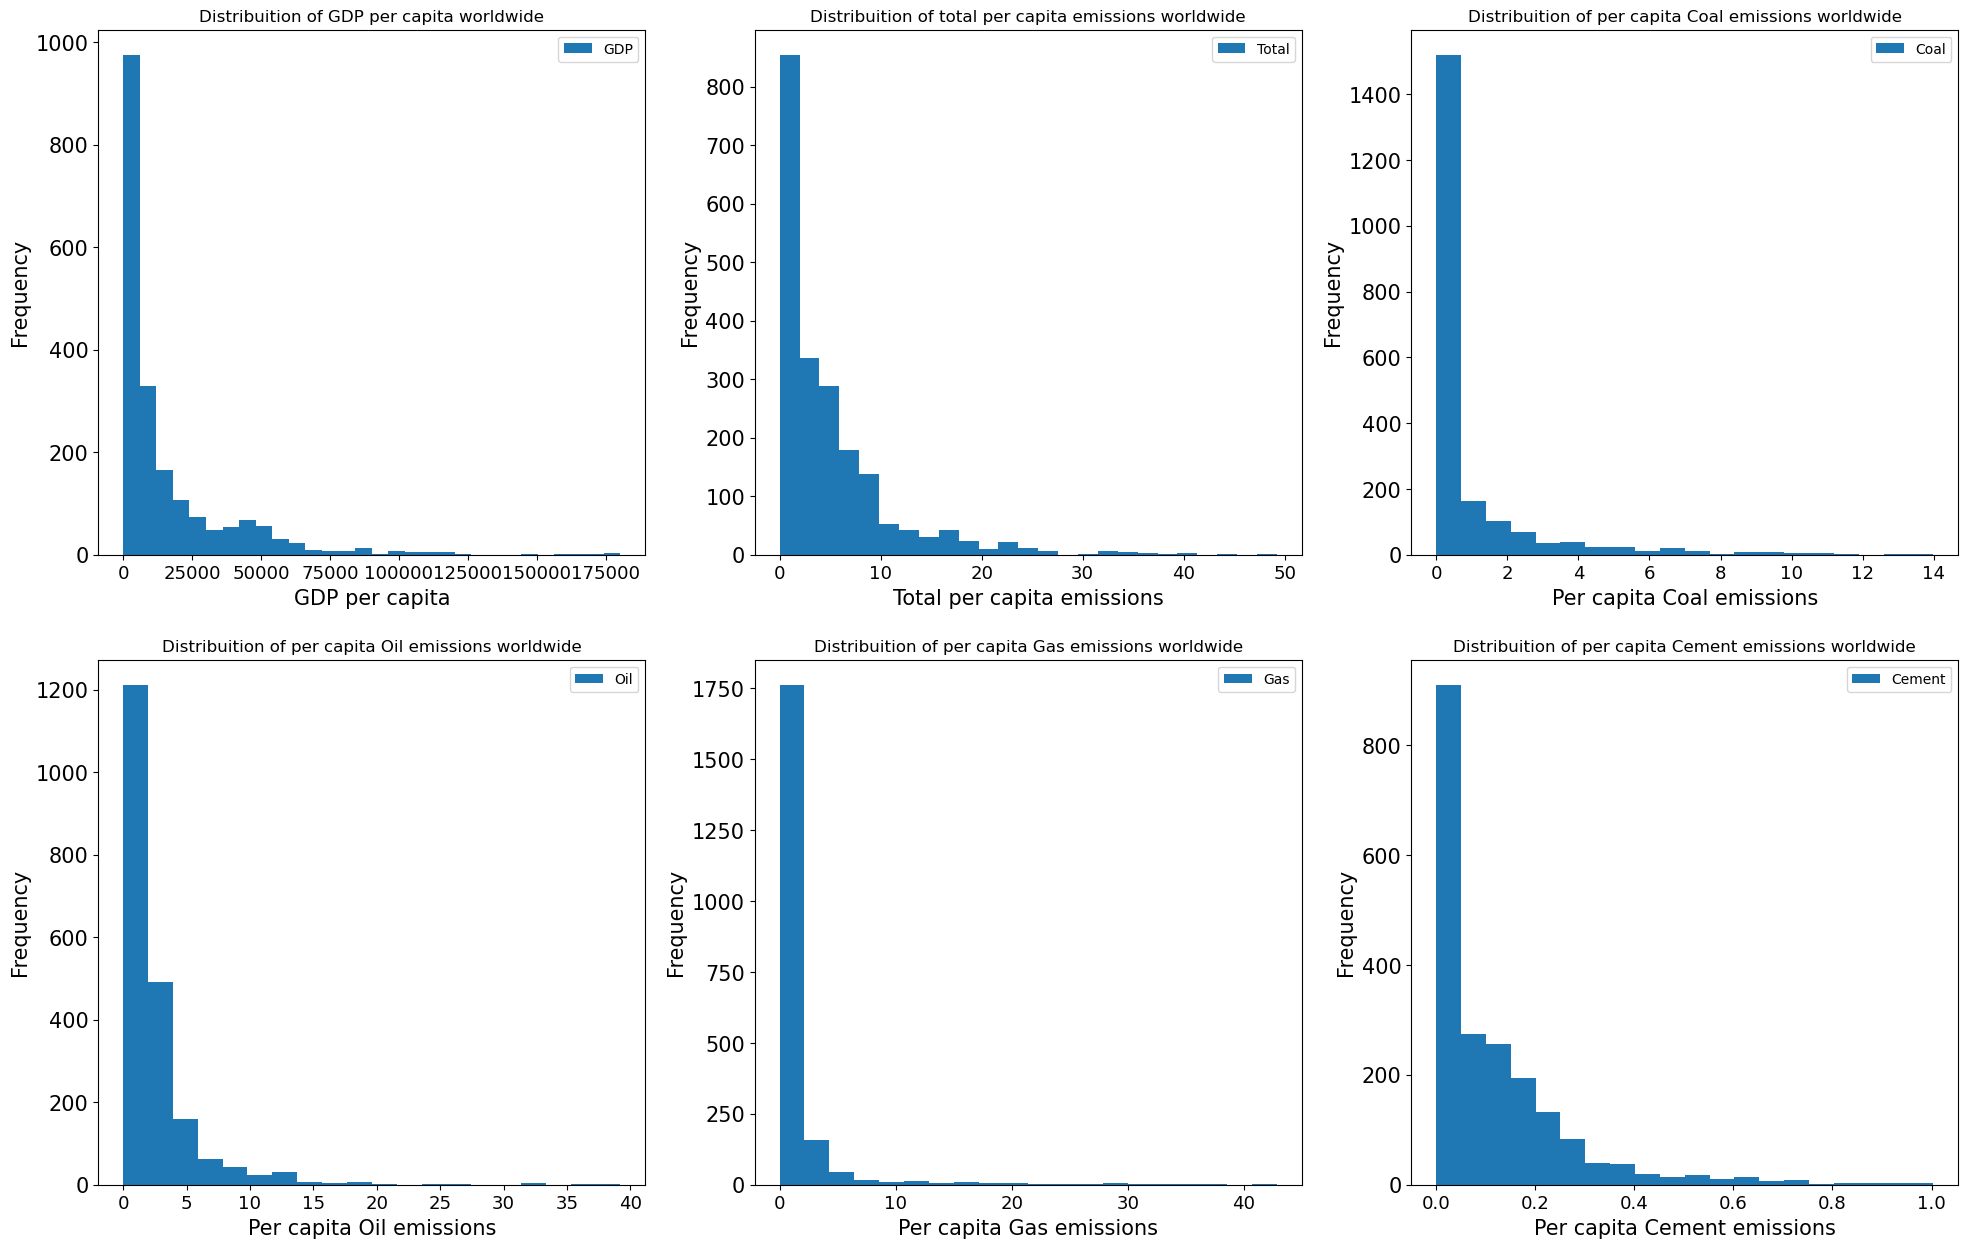

In [40]:
fig, axes = plt.subplots(2, 3, figsize=(24, 15))
axe = axes.ravel()

df.plot.hist(ax=axe[0], column="GDP", range = [0,max(df["GDP"])], bins = 30,title = "Distribuition of GDP per capita worldwide")
df.plot.hist(ax=axe[1], column="Total", range = [0,max(df["Total"])], bins = 25,title = "Distribuition of total per capita emissions worldwide")
df.plot.hist(ax=axe[2], column="Coal", range = [0,max(df["Coal"])], bins = 20,title = "Distribuition of per capita Coal emissions worldwide")
df.plot.hist(ax=axe[3], column="Oil", range = [0,max(df["Oil"])], bins = 20,title = "Distribuition of per capita Oil emissions worldwide")
df.plot.hist(ax=axe[4], column="Gas", range = [0,max(df["Gas"])], bins = 20,title = "Distribuition of per capita Gas emissions worldwide")
df.plot.hist(ax=axe[5], column="Cement", range = [0,max(df["Cement"])], bins = 20,title = "Distribuition of per capita Cement emissions worldwide");
axe[0].set_xlabel('GDP per capita', fontsize = 15)
axe[1].set_xlabel('Total per capita emissions', fontsize = 15)
axe[2].set_xlabel('Per capita Coal emissions', fontsize = 15)
axe[3].set_xlabel('Per capita Oil emissions', fontsize = 15)
axe[4].set_xlabel('Per capita Gas emissions', fontsize = 15)
axe[5].set_xlabel('Per capita Cement emissions', fontsize = 15)

for x in axe:
    x.tick_params(axis='x', labelsize=13)
    x.tick_params(axis='y', labelsize=15)
    x.set_ylabel('Frequency', fontsize = 15)


By looking at the histograms, we don't get much information, we see that there are several outliers for all variables and that they are all right-skewed.
- The Histogram for GDP ranges from 0 to 175000, with the majority of its values being below 50000. We see a peak at the first bin, telling us that the median lies between 0-6000.
- The Histogram for the variable Total ranges from 0 to 50, with the majority of its values being below 10. Similar to GDP we see a peak at the first bin, telling us that the median lies between 0-2.
- We see a very similar pattern in all the other variables, as they all have a peak in the first bin, however they all have different ranges. 

- The world has a lot of less developed, developing countries and small countries, that do not produce much emissions, and there are also only a few major developed countries that produce high amounts of emissions. Therefore, we see a right-skewed distribution for all the variables.

- The main problem with a skew is that having most of the values close to the origin and not many high values can make obtaining a relationship between variables hard. This is because we may not have enough high values to accurately predict the regression estimates. 

This may make it hard for us to come up with an analysis as most values are clustered around one area, this can be seen in the following scatterplots. 


**Scatterplots of the GDP per capita (y variable) with $CO_2$ emissions of different Fossil fuels (x variables)**

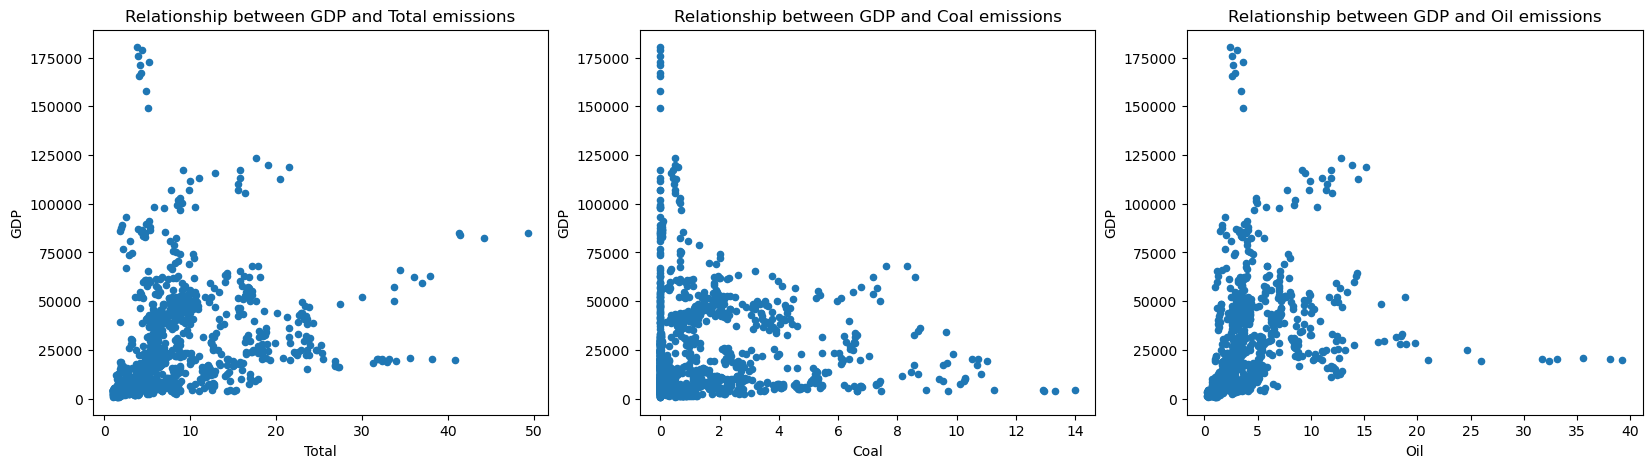

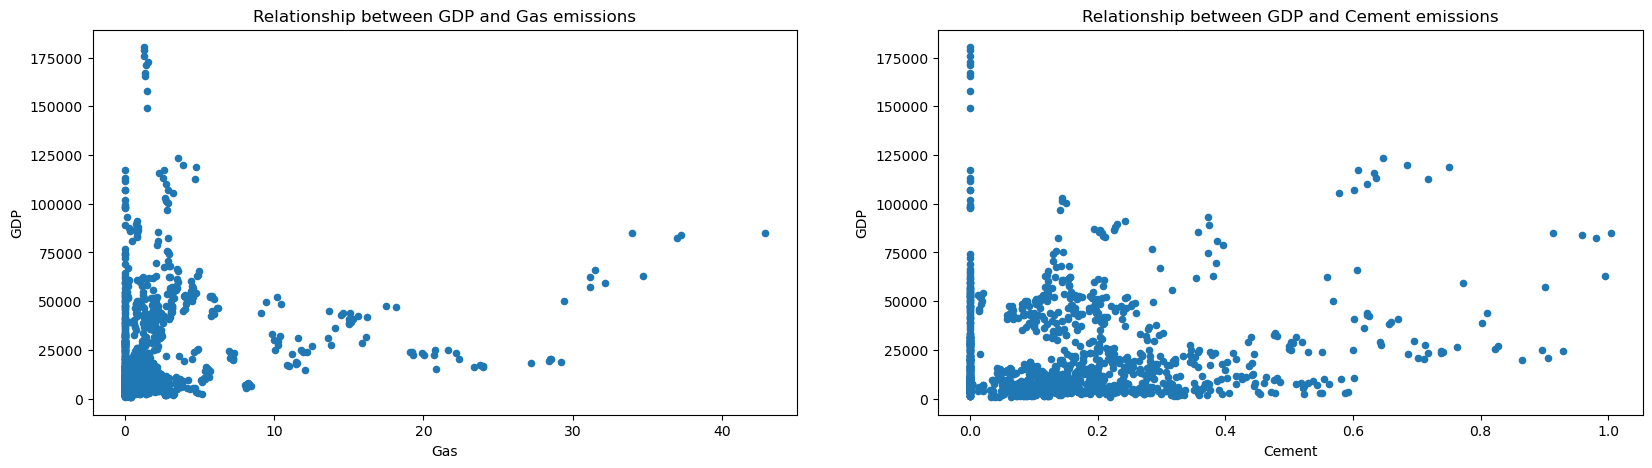

In [41]:
fig, axes = plt.subplots(1, 3, figsize=(20, 5))
axe = axes.ravel()
#df1 = df[df['Year'] == 2021] # filtering out outliers
#df2 = df1[df1['Total']<= 50]

q1 = df["Total"].quantile(0.70) # filtering outliers and clustered values at the origin
q2 = df["Total"].quantile(0.30) 
df2 = df[df["Total"] < q1]
df2 = df[df["Total"] > q2]

df2.plot.scatter(ax=axe[0], x = "Total", y = "GDP", title = "Relationship between GDP and Total emissions")
df2.plot.scatter(ax=axe[1], x = "Coal", y = "GDP", title = "Relationship between GDP and Coal emissions")
df2.plot.scatter(ax=axe[2], x = "Oil", y = "GDP", title = "Relationship between GDP and Oil emissions");

fig, axes = plt.subplots(1, 2, figsize=(20, 5))
axe = axes.ravel()

df2.plot.scatter(ax=axe[0], x = "Gas", y = "GDP", title = "Relationship between GDP and Gas emissions")
df2.plot.scatter(ax=axe[1], x = "Cement", y = "GDP", title = "Relationship between GDP and Cement emissions");


Even after filtering out the data for outliers and reducing the cluster of data points at the origin, we still see that a lot of points are clustered at the origin. 

However, we do see a rough positive relationship between GDP per capita and total emissions per capita. Similarly we see a slight relationship between GDP and Oil, however the number of large values makes it difficult to determine the true relationship. The same follows for the other graphs, therefore making it harder to determine whether there is a positive linear relationship between GDP per capita and the $CO_{2}$ emissions of different fossil fuels. 

Due to having very few large values and most of the points being centred around the origin, we plot the log of the X variables with log GDP per capita. We do this to see if it helps visualizing a relationship between the two variables better than without. 

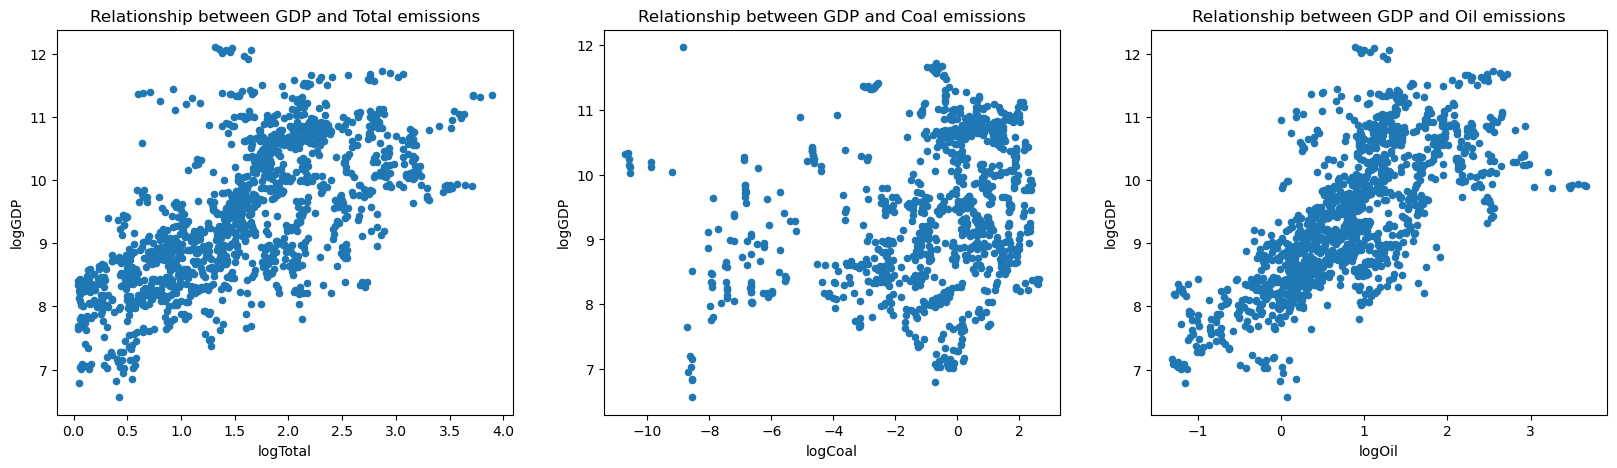

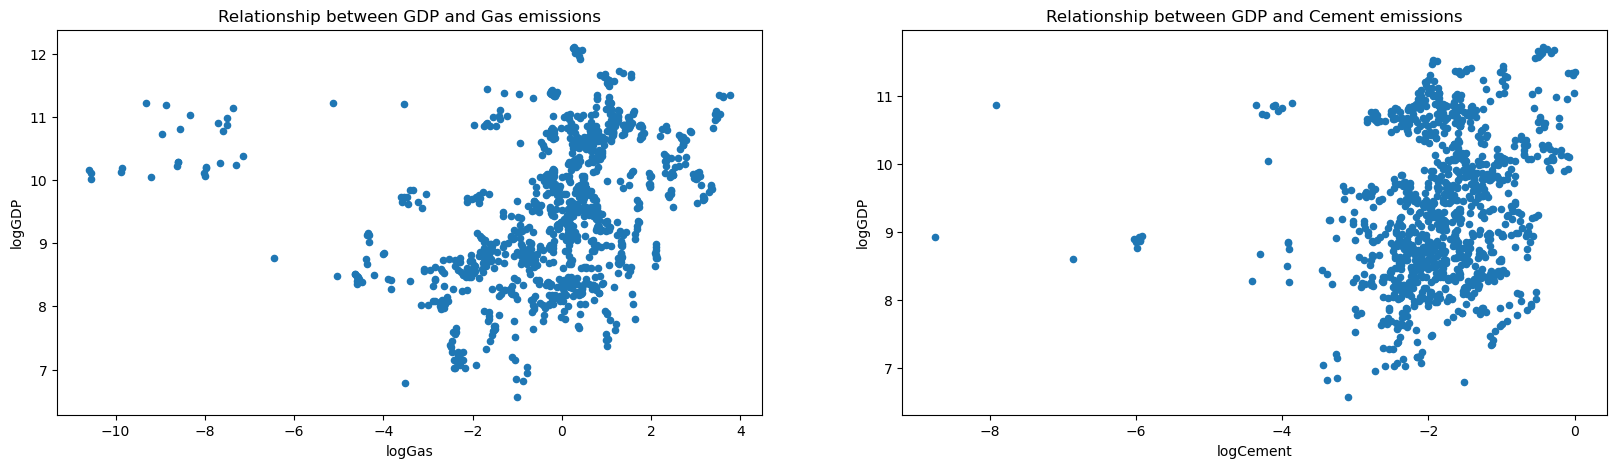

In [42]:
fig, axes = plt.subplots(1, 3, figsize=(20, 5))
axe = axes.ravel()
#df1 = df[df['Year'] == 2021] # filtering out outliers
#df2 = df1[df1['Total']<= 50]

q1 = df["Total"].quantile(0.70) # filtering outliers and clustered values at the origin
q2 = df["Total"].quantile(0.30) 
df2 = df[df["Total"] < q1]
df2 = df[df["Total"] > q2]

df2.plot.scatter(ax=axe[0], x = "logTotal", y = "logGDP", title = "Relationship between GDP and Total emissions")
df2.plot.scatter(ax=axe[1], x = "logCoal", y = "logGDP", title = "Relationship between GDP and Coal emissions")
df2.plot.scatter(ax=axe[2], x = "logOil", y = "logGDP", title = "Relationship between GDP and Oil emissions");

fig, axes = plt.subplots(1, 2, figsize=(20, 5))
axe = axes.ravel()

df2.plot.scatter(ax=axe[0], x = "logGas", y = "logGDP", title = "Relationship between GDP and Gas emissions")
df2.plot.scatter(ax=axe[1], x = "logCement", y = "logGDP", title = "Relationship between GDP and Cement emissions");


After plotting the log of the variables. We see a much clearer positive relationship between GDP per capita and Oil emissions per capita. We also see a rough positive relationship between GDP per capita and Total emissions per capita. The relationship between GDP and other variables is still hard to determine but seems slightly positive. 

This relationship would also be easier to identify using a linear regression. First, in order to get a better idea of the relation I look at a smaller group of countries to reduce the number of values in the scatterplot to get a better idea of the relationship between the variables.

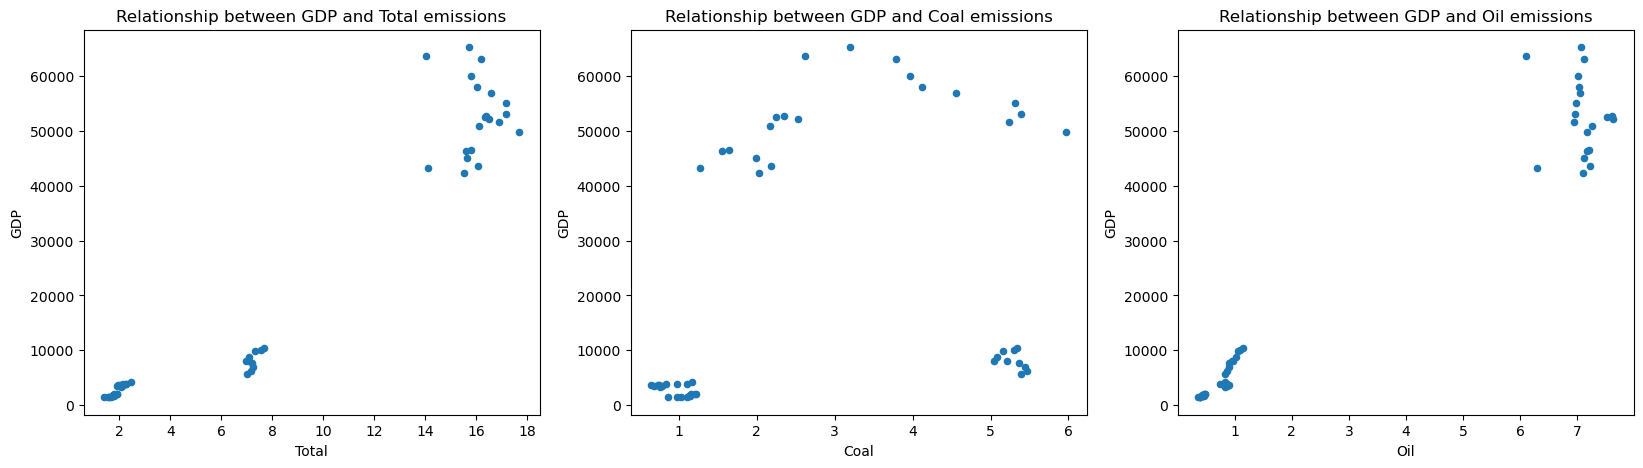

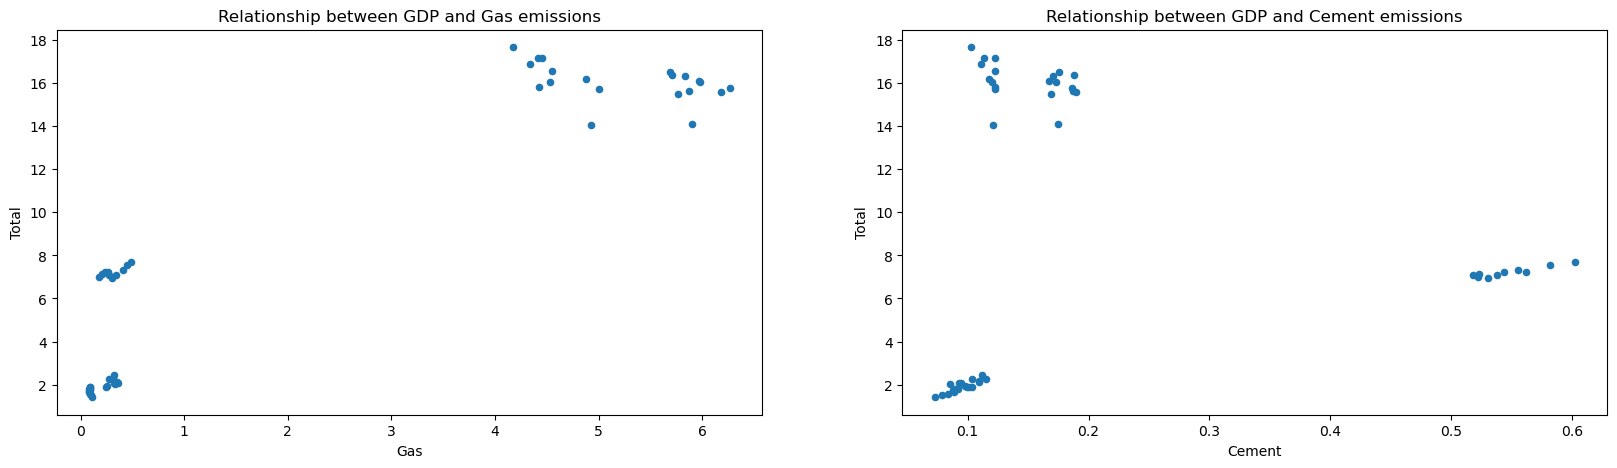

In [43]:
df_can = df[df["Country"] == "Canada"]
df_usa = df[df["Country"] == "USA"]
df_ind = df[df["Country"] == "India"]
df_chi = df[df["Country"] == "China"]
df_indo = df[df["Country"] == "Indonesia"]
df_wor = pd.concat([df_can,df_usa,df_ind,df_chi,df_indo])
fig, axes = plt.subplots(1, 3, figsize=(20, 5))
axe = axes.ravel()
df_wor.plot.scatter(ax=axe[0], x = "Total", y = "GDP", title = "Relationship between GDP and Total emissions")
df_wor.plot.scatter(ax=axe[1], x = "Coal", y = "GDP", title = "Relationship between GDP and Coal emissions")
df_wor.plot.scatter(ax=axe[2], x = "Oil", y = "GDP", title = "Relationship between GDP and Oil emissions");

fig, axes = plt.subplots(1, 2, figsize=(20, 5))
axe = axes.ravel()
df_wor.plot.scatter(ax=axe[0], x = "Gas", y = "Total", title = "Relationship between GDP and Gas emissions")
df_wor.plot.scatter(ax=axe[1], x = "Cement", y = "Total", title="Relationship between GDP and Cement emissions");

Since I selected 2 developed and 3 developing countries, the values are at extremes, however it shows us that there is a positive correlation between certain variables. 

We see a clear positive correlation between GDP per capita and Total per capita emissions. 

From the graphs we can see that there appears to be a correlation between fossil fuels: Gas, Oil and Flaring with the GDP of a country. However, we do not see the same relationship with Coal and Cement, the scatterplots for these two x variables seems to be more scattered and random. 

- The distribution between GDP per capita and total per capita emissions is the strongest correlation out of all the graphs, with not many variables deviating from the straight line. This is mostly cause the total emissions encompasses all types of emissions, giving us a clearer picture. While individual fuels may vary a lot depending on the country and its access to that fuel. 

- Out of the three positive relationships, Oil and Gas seem to have a much strongest correlation compared to Flaring,   which may have a quadratic regression. 

- The distribution of Cement has a lot of extreme values(values of GDP per capita for low levels of cement vary a lot), therefore making it hard to find a distinct linear relationship between the two variables.

Therefore, We can tell that there is a significant relationship between GDP per capita and Total emissions per capita and that the fossil fuels Oil Gas and Flaring are correlated with GDP per capita as well.


# Project Two

## The Message


The main message of this paper is to establish the relationship between emissions per capita in a country and the development level. The results we establish through this paper are that countries with higher emissions per capita are more likely to be countries with a higher development level(GDP per capita) rather than a country with a lower development level. This is likely due to the fact that even though developed countries have access to more resources and technology, this leads to them producing more goods, which use a lot more fossil fuels. Therefore, leading to higher emissions per capita. 

Since these are the countries with more resources, their ability to decrease their emissions and use more eco-friendly emissions should be easier and working towards reducing these emissions shouldn't be as hard as it currently is, as most of the focus is being put on countries with lower GDP per capita but higher total emissions per capita due to larger population sizes.


**Histograms all variables showing the difference between developed and developing countries**

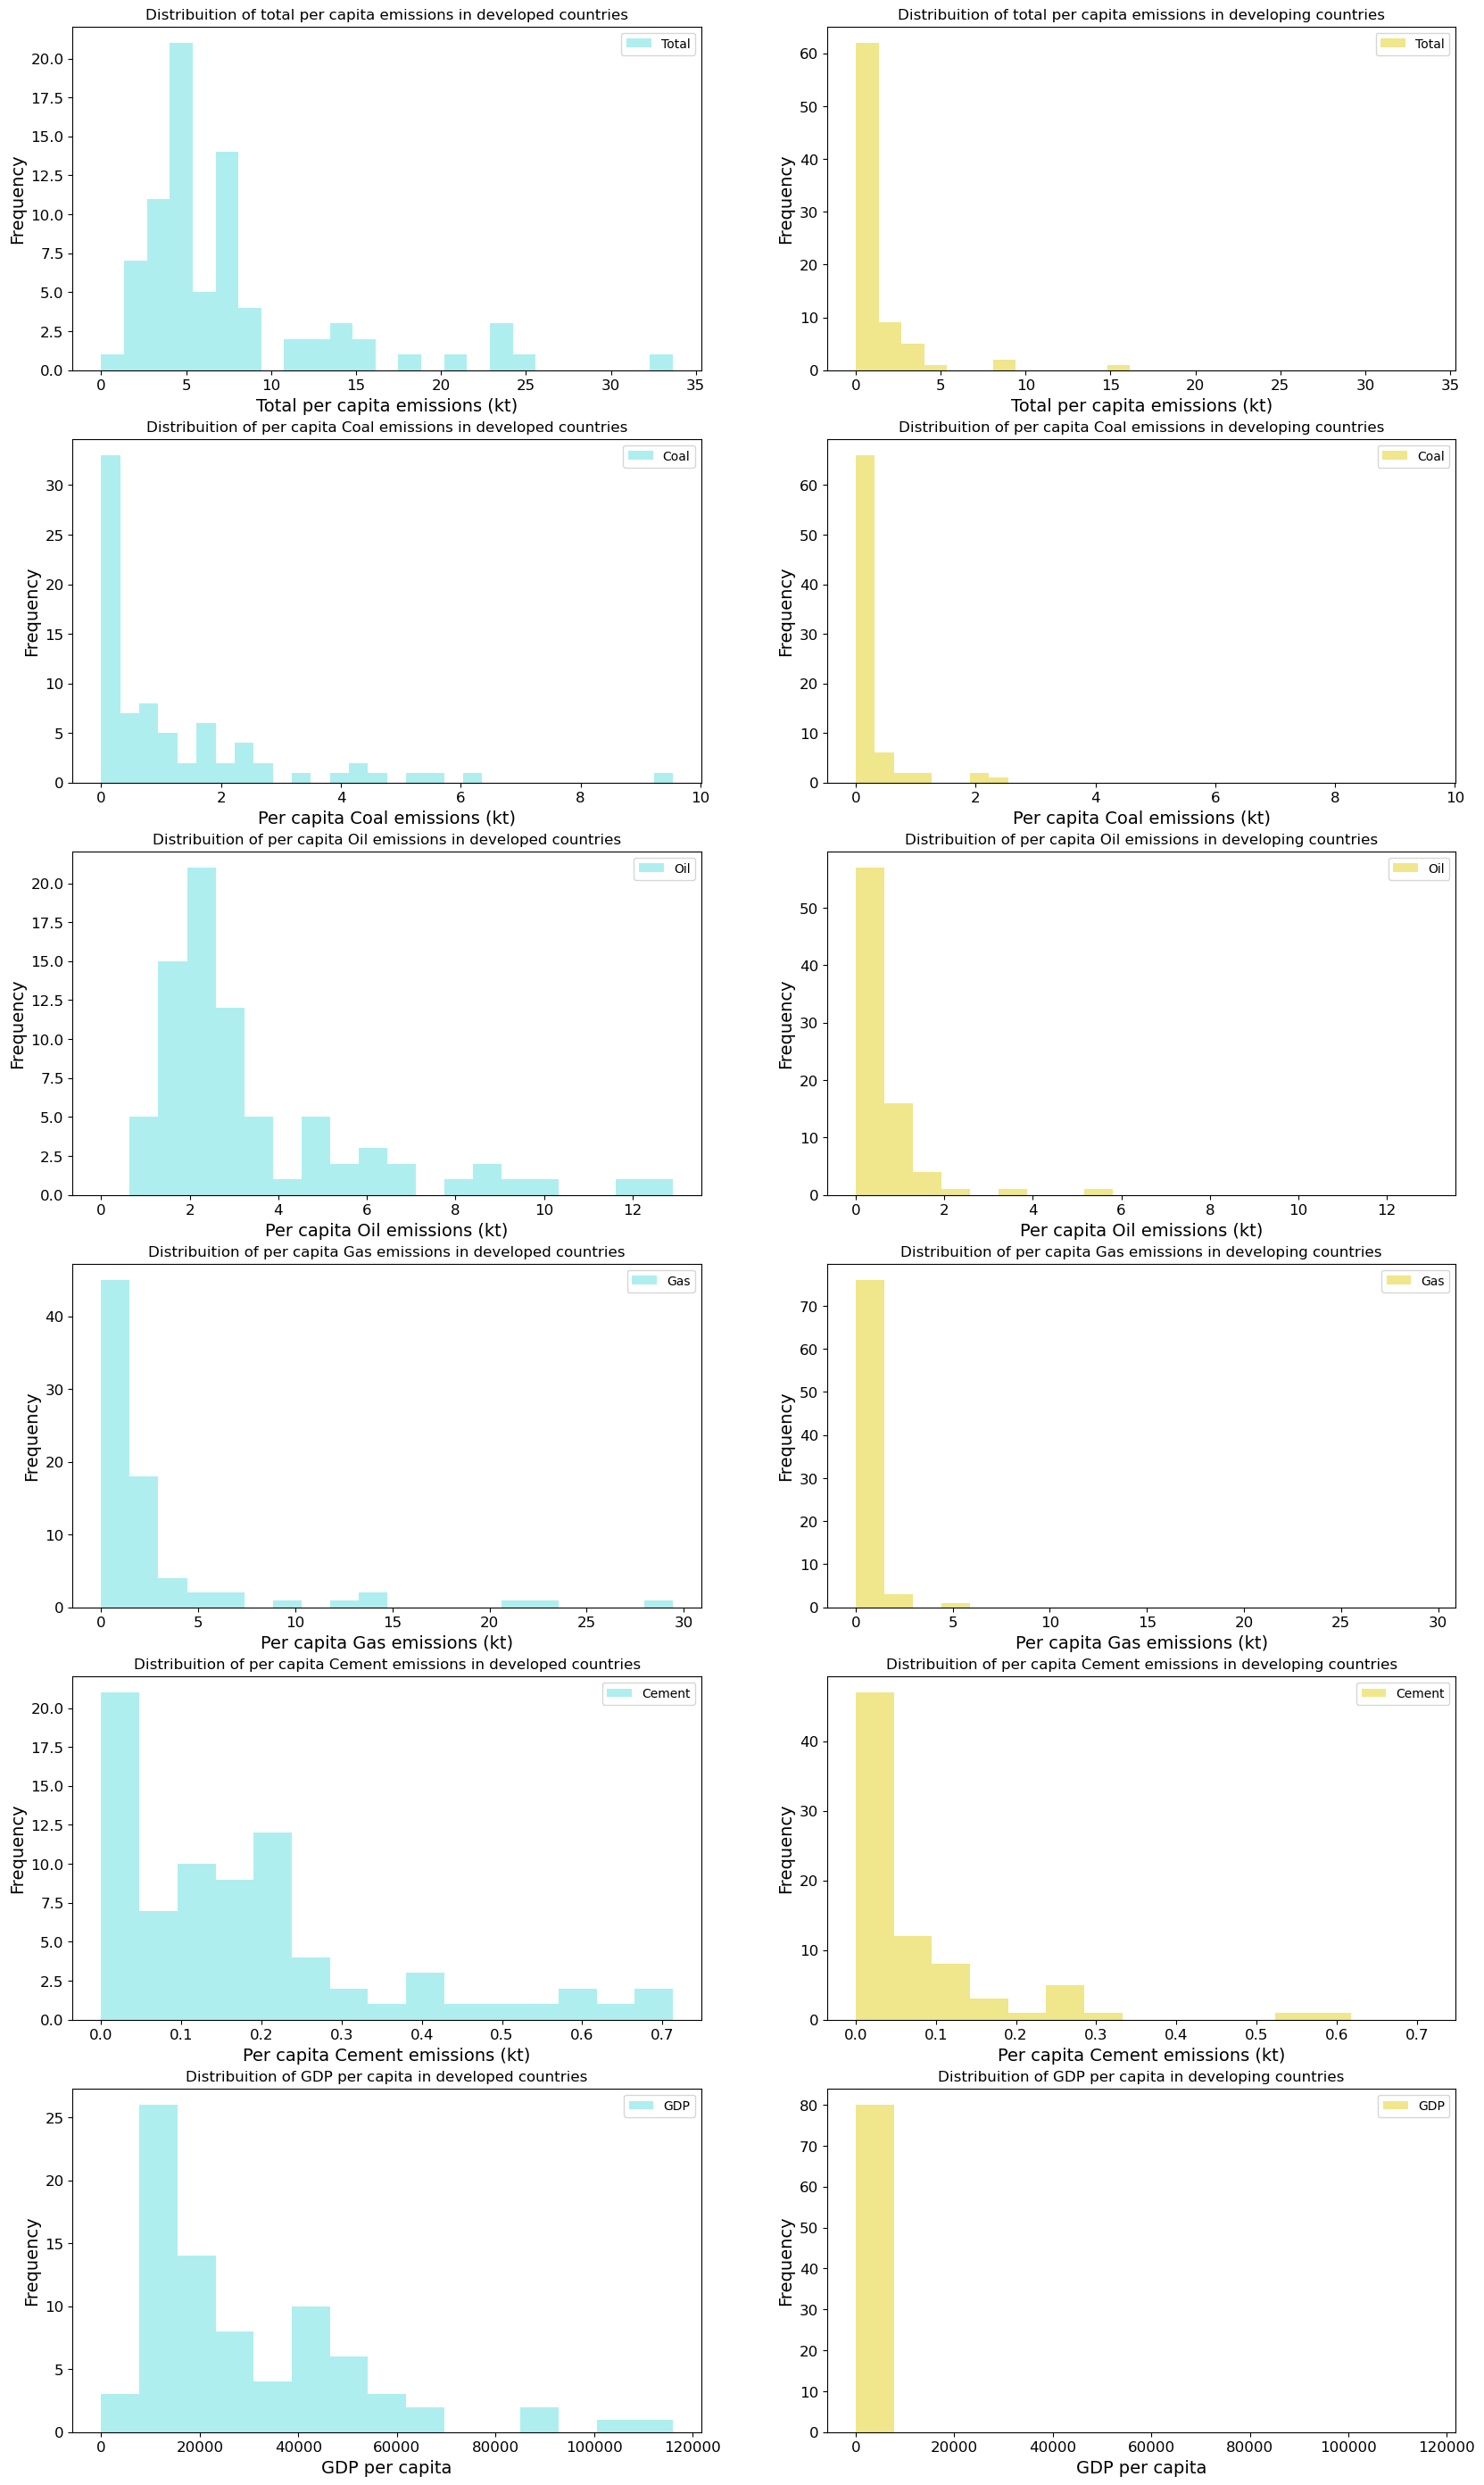

In [44]:
fig, axes = plt.subplots(6, 2, figsize=(20, 35))
axe = axes.ravel()

df_developed.plot.hist(ax=axe[0], column="Total", range = [0,max(df_developed["Total"])], bins = 25,title = "Distribuition of total per capita emissions in developed countries", color = 'paleturquoise')
df_developing.plot.hist(ax=axe[1], column="Total", range = [0,max(df_developed["Total"])], bins = 25,title = "Distribuition of total per capita emissions in developing countries", color = 'khaki')

df_developed.plot.hist(ax=axe[2], column="Coal", range = [0,max(df_developed["Coal"])], bins = 30,title = "Distribuition of per capita Coal emissions in developed countries", color = 'paleturquoise')
df_developing.plot.hist(ax=axe[3], column="Coal", range = [0,max(df_developed["Coal"])], bins = 30,title = "Distribuition of per capita Coal emissions in developing countries", color = 'khaki')

df_developed.plot.hist(ax=axe[4], column="Oil", range = [0,max(df_developed["Oil"])], bins = 20,title = "Distribuition of per capita Oil emissions in developed countries", color = 'paleturquoise')
df_developing.plot.hist(ax=axe[5], column="Oil", range = [0,max(df_developed["Oil"])], bins = 20,title = "Distribuition of per capita Oil emissions in developing countries", color = 'khaki')

df_developed.plot.hist(ax=axe[6], column="Gas", range = [0,max(df_developed["Gas"])], bins = 20,title = "Distribuition of per capita Gas emissions in developed countries", color = 'paleturquoise')
df_developing.plot.hist(ax=axe[7], column="Gas", range = [0,max(df_developed["Gas"])], bins = 20,title = "Distribuition of per capita Gas emissions in developing countries", color = 'khaki')

df_developed.plot.hist(ax=axe[8], column="Cement", range = [0,max(df_developed["Cement"])], bins = 15,title = "Distribuition of per capita Cement emissions in developed countries", color = 'paleturquoise')
df_developing.plot.hist(ax=axe[9], column="Cement", range = [0,max(df_developed["Cement"])], bins = 15,title = "Distribuition of per capita Cement emissions in developing countries", color = 'khaki')

df_developed.plot.hist(ax=axe[10], column="GDP", range = [0,max(df_developed["GDP"])], bins = 15,title = "Distribuition of GDP per capita in developed countries", color = 'paleturquoise')
df_developing.plot.hist(ax=axe[11], column="GDP", range = [0,max(df_developed["GDP"])], bins = 15,title = "Distribuition of GDP per capita in developing countries", color = 'khaki');

axe[0].set_xlabel('Total per capita emissions (kt)', fontsize = 14)
axe[1].set_xlabel('Total per capita emissions (kt)', fontsize = 14)
axe[2].set_xlabel('Per capita Coal emissions (kt)', fontsize = 14)
axe[3].set_xlabel('Per capita Coal emissions (kt)', fontsize = 14)
axe[4].set_xlabel('Per capita Oil emissions (kt)', fontsize = 14)
axe[5].set_xlabel('Per capita Oil emissions (kt)', fontsize = 14)
axe[6].set_xlabel('Per capita Gas emissions (kt)', fontsize = 14)
axe[7].set_xlabel('Per capita Gas emissions (kt)', fontsize = 14)
axe[8].set_xlabel('Per capita Cement emissions (kt)', fontsize = 14)
axe[9].set_xlabel('Per capita Cement emissions (kt)', fontsize = 14)
axe[10].set_xlabel('GDP per capita', fontsize = 14)
axe[11].set_xlabel('GDP per capita', fontsize = 14)

for x in axe:
    x.tick_params(axis='x', labelsize=12)
    x.tick_params(axis='y', labelsize=12)
    x.set_ylabel('Frequency', fontsize = 14)

We see a very obvious difference between the histograms for developed countries(the Left side) and developing countries(the Right side). 
- The histograms for developing countries are very low and peak in the first bin for all variables, this isn't the case with the developed countries, they are still right skewed but the values vary much more. 
- The graphs clearly show that developed countries have much higher values than developing countries for all variables
This gives us a much better answer to our research question, as we can clearly see a difference between low and high GDP per capita countries. 

**Scatterplots of the GDP per capita with $CO_2$ emissions of different Fossil fuels, showing the difference between developed and developing countries**

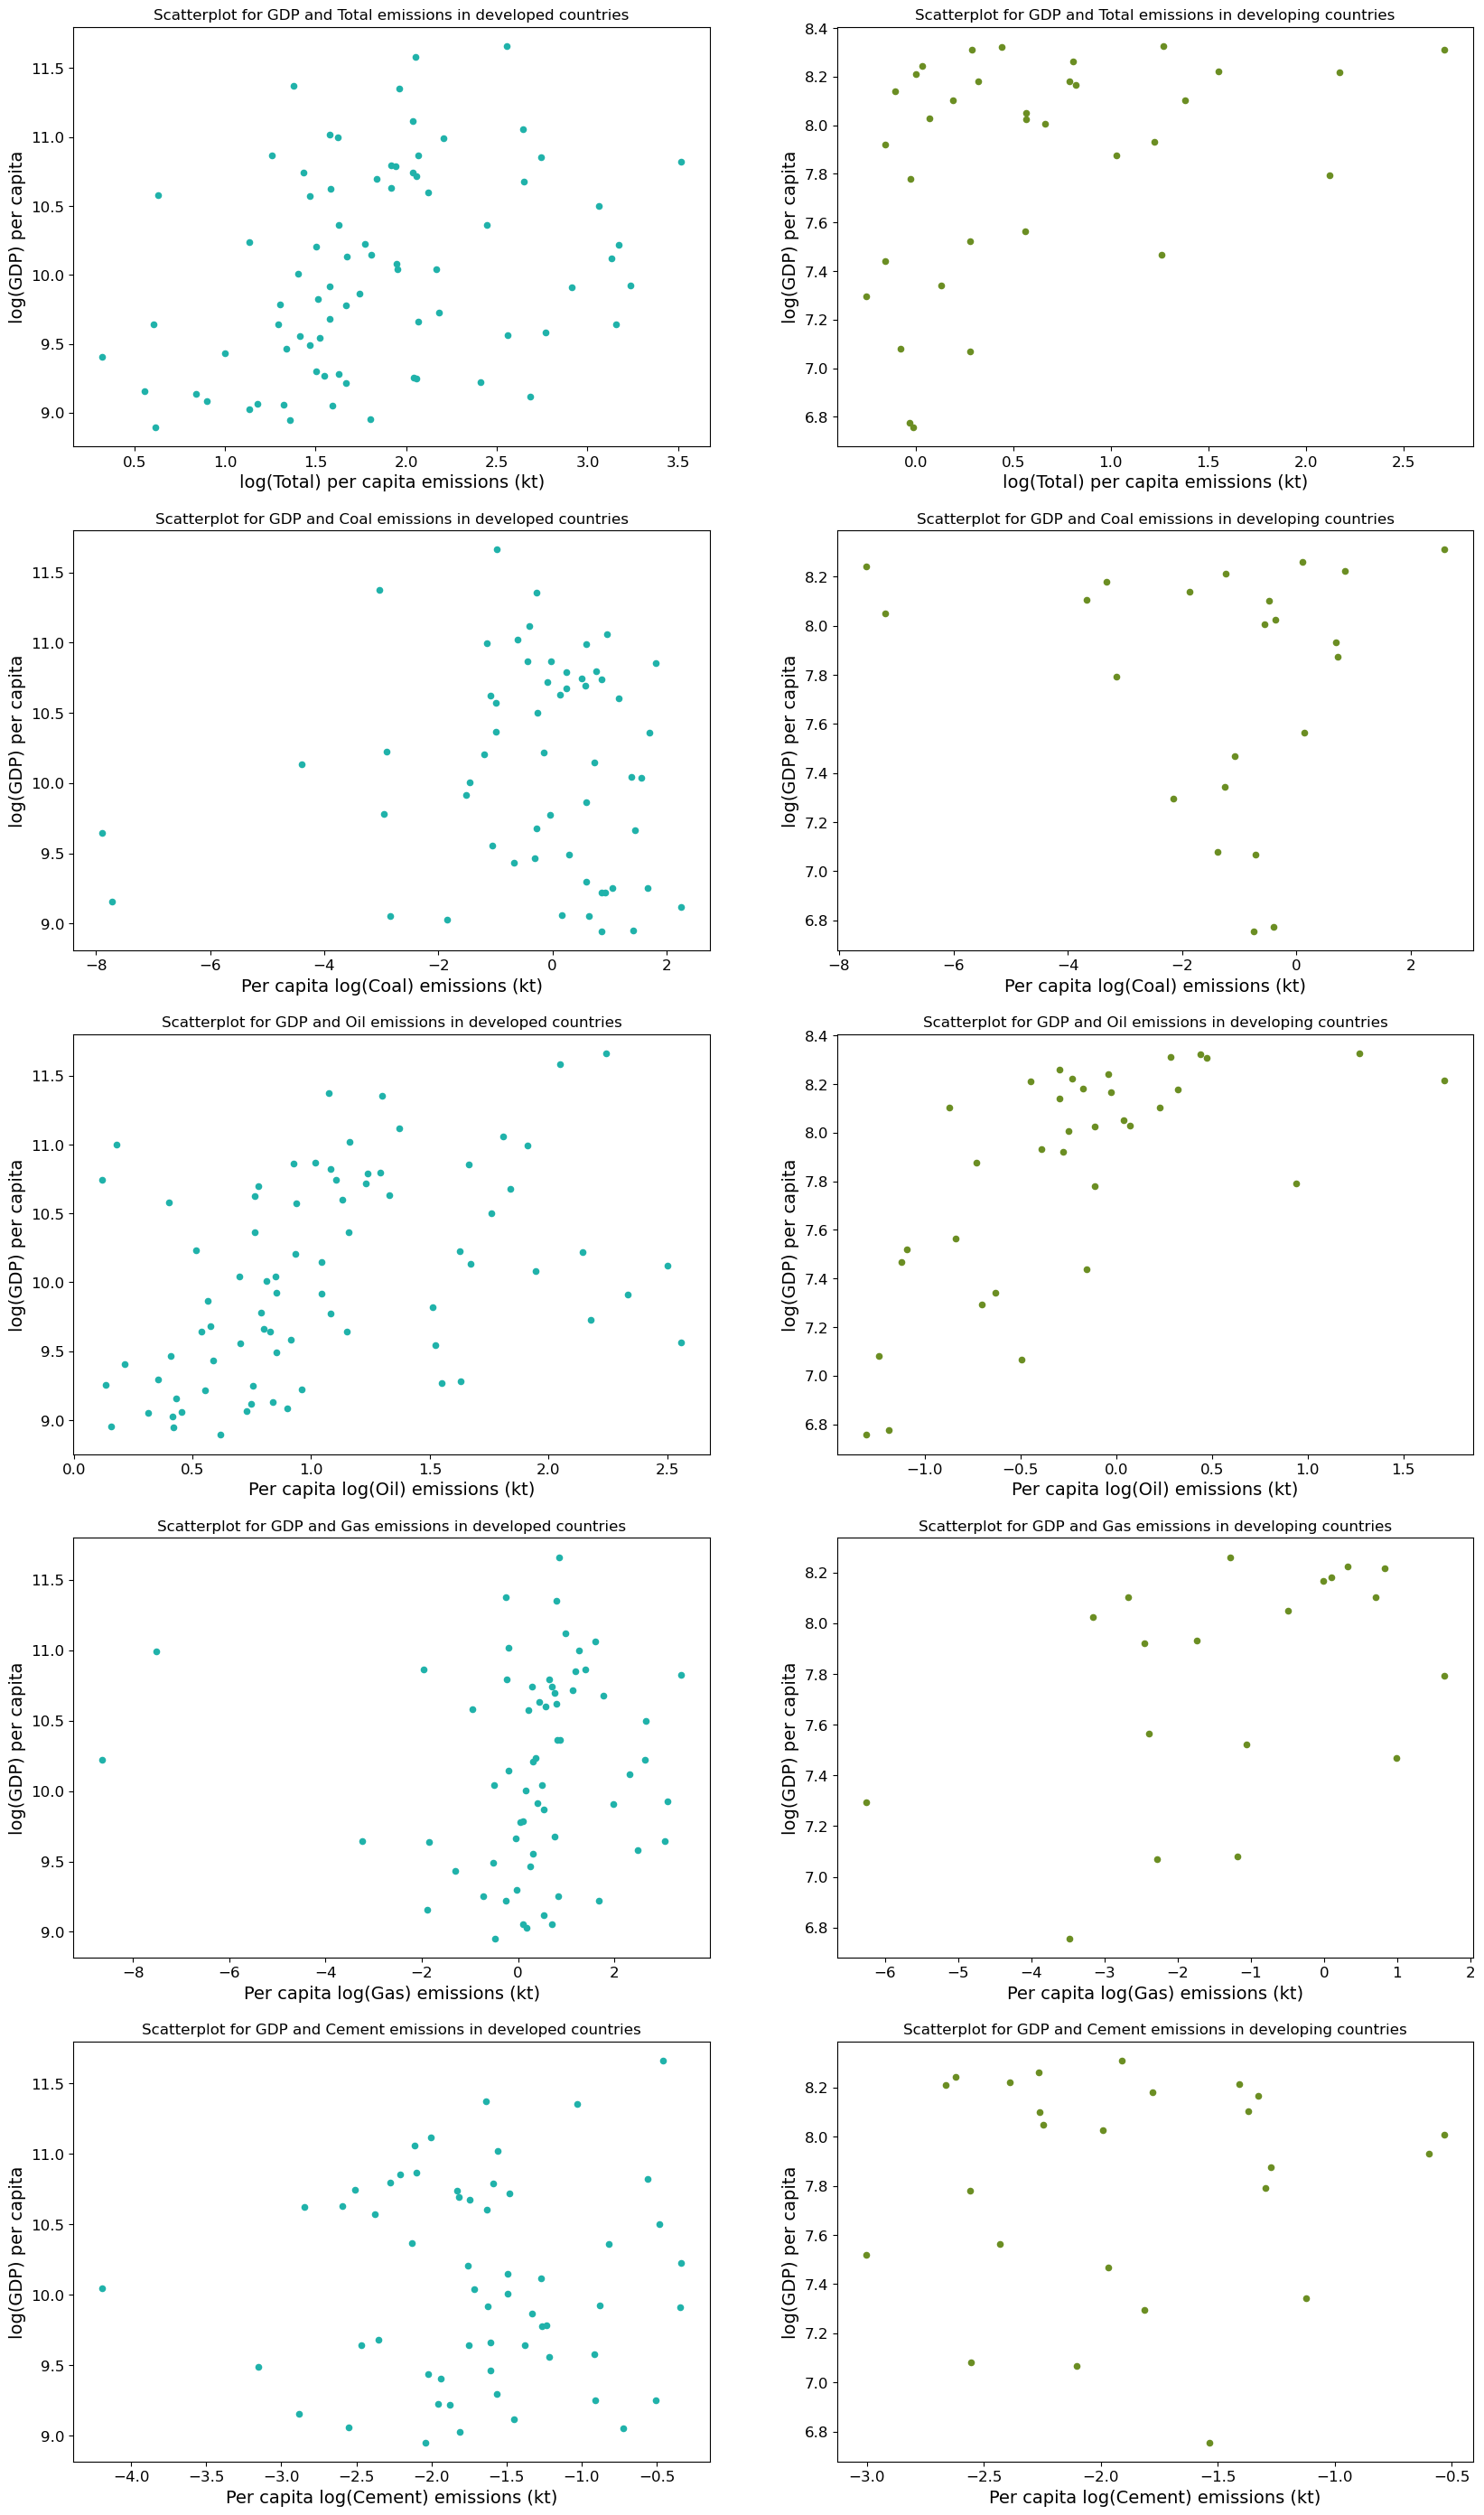

In [45]:
fig, axes = plt.subplots(5, 2, figsize=(20, 35))
axe = axes.ravel()
df_developed2 = df_developed[df_developed["Total"]>0.7]
df_developing2 = df_developing[df_developing["Total"]>0.7]

df_developed2.plot.scatter(ax=axe[0],x = "logTotal", y = "logGDP", title = "Scatterplot for GDP and Total emissions in developed countries", color = 'lightseagreen')
df_developing2.plot.scatter(ax=axe[1],x = "logTotal", y = "logGDP",title = "Scatterplot for GDP and Total emissions in developing countries", color = 'olivedrab')
df_developed2.plot.scatter(ax=axe[2],x = "logCoal", y = "logGDP", title = "Scatterplot for GDP and Coal emissions in developed countries", color = 'lightseagreen')
df_developing2.plot.scatter(ax=axe[3],x = "logCoal", y = "logGDP", title = "Scatterplot for GDP and Coal emissions in developing countries", color = 'olivedrab')
df_developed2.plot.scatter(ax=axe[4],x = "logOil", y = "logGDP", title = "Scatterplot for GDP and Oil emissions in developed countries", color = 'lightseagreen')
df_developing2.plot.scatter(ax=axe[5],x = "logOil", y = "logGDP", title = "Scatterplot for GDP and Oil emissions in developing countries", color = 'olivedrab')
df_developed2.plot.scatter(ax=axe[6], x = "logGas", y = "logGDP", title = "Scatterplot for GDP and Gas emissions in developed countries", color = 'lightseagreen')
df_developing2.plot.scatter(ax=axe[7], x = "logGas", y = "logGDP", title = "Scatterplot for GDP and Gas emissions in developing countries", color = 'olivedrab')
df_developed2.plot.scatter(ax=axe[8], x = "logCement", y = "logGDP", title = "Scatterplot for GDP and Cement emissions in developed countries", color = 'lightseagreen')
df_developing2.plot.scatter(ax=axe[9], x = "logCement", y = "logGDP", title = "Scatterplot for GDP and Cement emissions in developing countries", color = 'olivedrab')

axe[0].set_xlabel('log(Total) per capita emissions (kt)', fontsize = 14)
axe[1].set_xlabel('log(Total) per capita emissions (kt)', fontsize = 14)
axe[2].set_xlabel('Per capita log(Coal) emissions (kt)', fontsize = 14)
axe[3].set_xlabel('Per capita log(Coal) emissions (kt)', fontsize = 14)
axe[4].set_xlabel('Per capita log(Oil) emissions (kt)', fontsize = 14)
axe[5].set_xlabel('Per capita log(Oil) emissions (kt)', fontsize = 14)
axe[6].set_xlabel('Per capita log(Gas) emissions (kt)', fontsize = 14)
axe[7].set_xlabel('Per capita log(Gas) emissions (kt)', fontsize = 14)
axe[8].set_xlabel('Per capita log(Cement) emissions (kt)', fontsize = 14)
axe[9].set_xlabel('Per capita log(Cement) emissions (kt)', fontsize = 14)

for x in axe:
    x.tick_params(axis='x', labelsize=12)
    x.tick_params(axis='y', labelsize=12)
    x.set_ylabel('log(GDP) per capita', fontsize = 14)
    

Similar to the histograms, the values for developing countries are much clustered around the y-axis. We reduce this problem by taking the logs of both variables. However, by splitting the dataset into two categories, we can see a much clearer relationship. 

- We can see a positive relationship between, GDP per capita vs Total per capita emissions,  GDP per capita vs Oil emissions and GDP per capita vs cement emissions. This relationship can be made more obvious with more values. However, to know the true distribution and whether the relationship is linear, we would need to run an OLS regression.
- From the graphs for Gas and Coal it's hard to see the relationship between the variables and we need more points to verify this. 

Therefore, these graphs give us a different result from the data before we split into developed and developing countries. We now see a more obvious relationship between GDP and cement, and a somewhat positive relationship between GDP and Gas, which is hard to determine in previous graphs. 

However, it tells us similar information on how there is a strong positive relationship between GDP per capita and Total per capita emissions.

Text(0, 0.5, 'Per Capita Emissions')

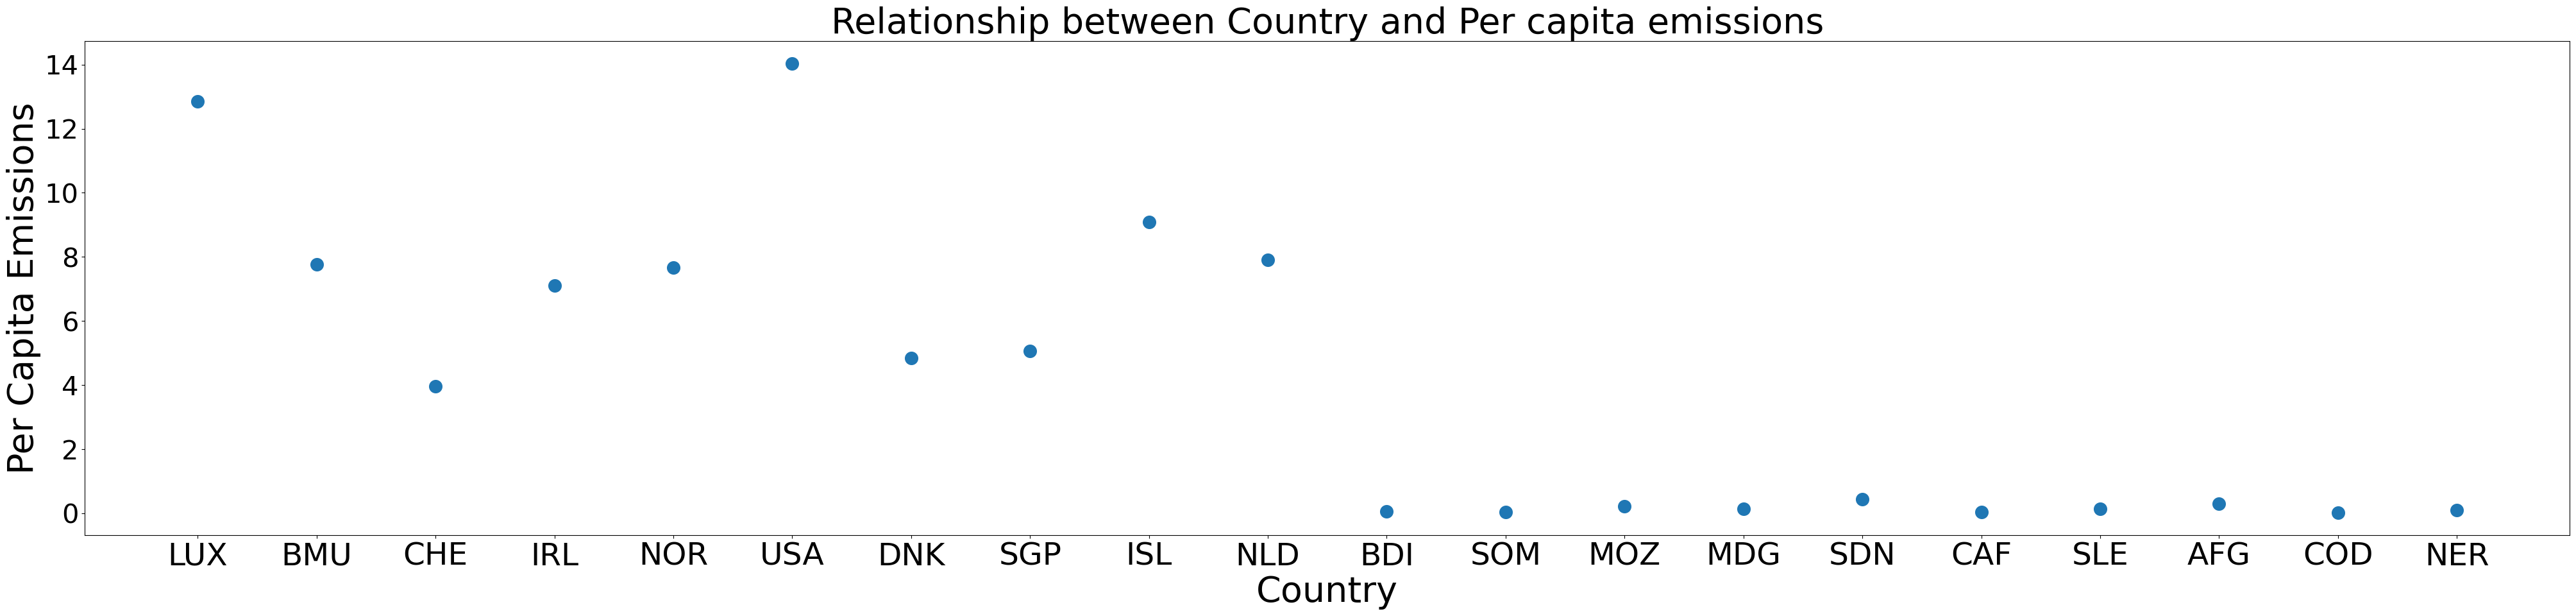

In [46]:
df_D = df_developed.iloc[0:10,:]
df_Dd = df_developing.iloc[0:10,:]

df_fin = pd.concat([df_D,df_Dd]) # combining the two datasets
plt.figure(figsize=(50, 10))
plt.scatter(x = df_fin["ISO 3166-1 alpha-3"], y = df_fin["Total"], s=200)
plt.xticks(fontsize=35)
plt.title("Relationship between Country and Per capita emissions", fontsize=40)
plt.xlabel('Country', fontsize=40)
plt.yticks(fontsize=30)
plt.ylabel('Per Capita Emissions', fontsize=40)

From the above scatterplots, we can see that the countries with lower GDP per capita to that of the countries with higher GDP per capita as well. The above graph clearly shows us that developed countries are contributing way more to the world's $CO_2$ emissions.

This tells us that the countries that are contributing a lot to the problem are the more developed countries and not the more densely populated, less developed countries. 

## Maps and Interpretations

In [47]:
# Read the file
world = gpd.read_file(gpd.datasets.get_path("naturalearth_lowres"))
df_2021 = df[df["Year"] == 2020]
df_2021 = df_2021.drop(df_2021.iloc[:,[0,2]], axis = 1) # filtering out "Year" and "Country" variables.
world = world.merge(df_2021, left_on="iso_a3", right_on="ISO 3166-1 alpha-3", how="inner")
world = world.drop("ISO 3166-1 alpha-3", axis='columns')

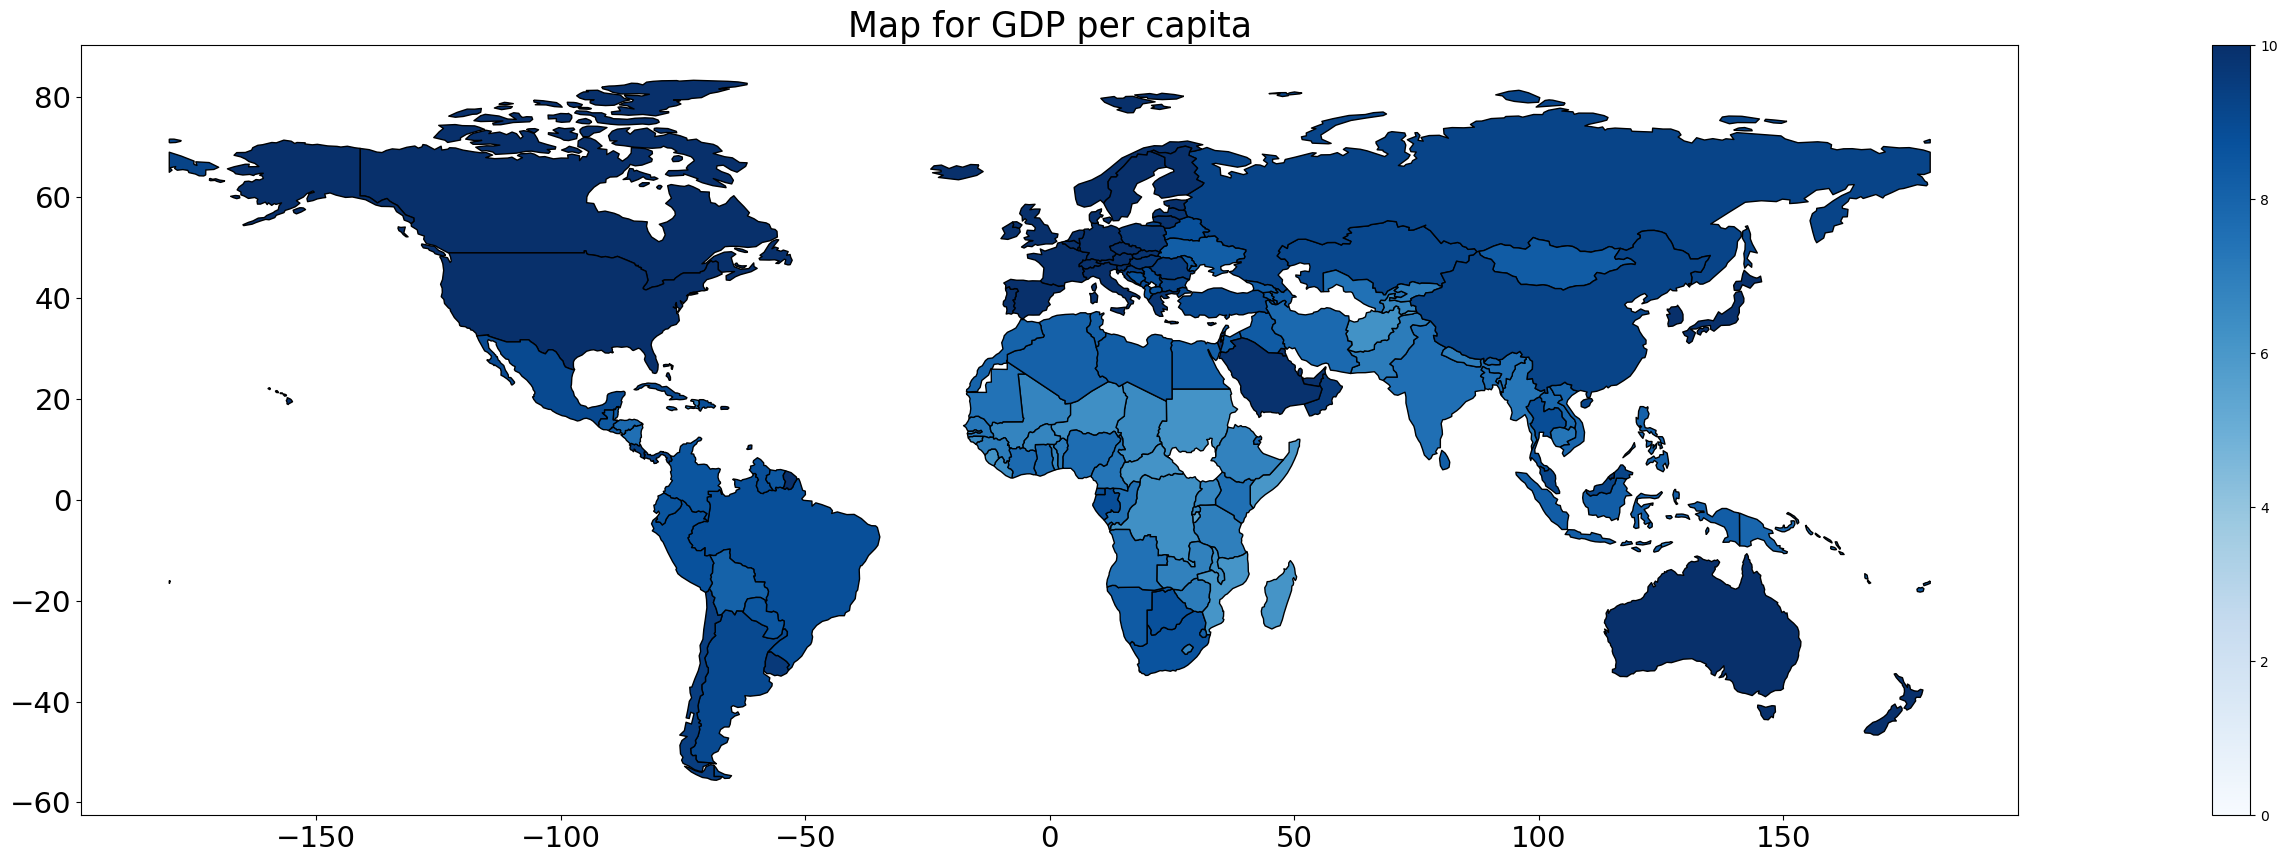

In [48]:
# plot the continent
fig, gax = plt.subplots(figsize = (50,10))

world.plot(
    ax=gax, edgecolor='black', column='logGDP', legend=True, cmap='Blues',
    vmin=0, vmax=10
)
gax.set_title('Map for GDP per capita', fontsize=25)
plt.xticks(fontsize=21)
plt.yticks(fontsize=21)
# pass co2 emissions as the data to color
plt.show()

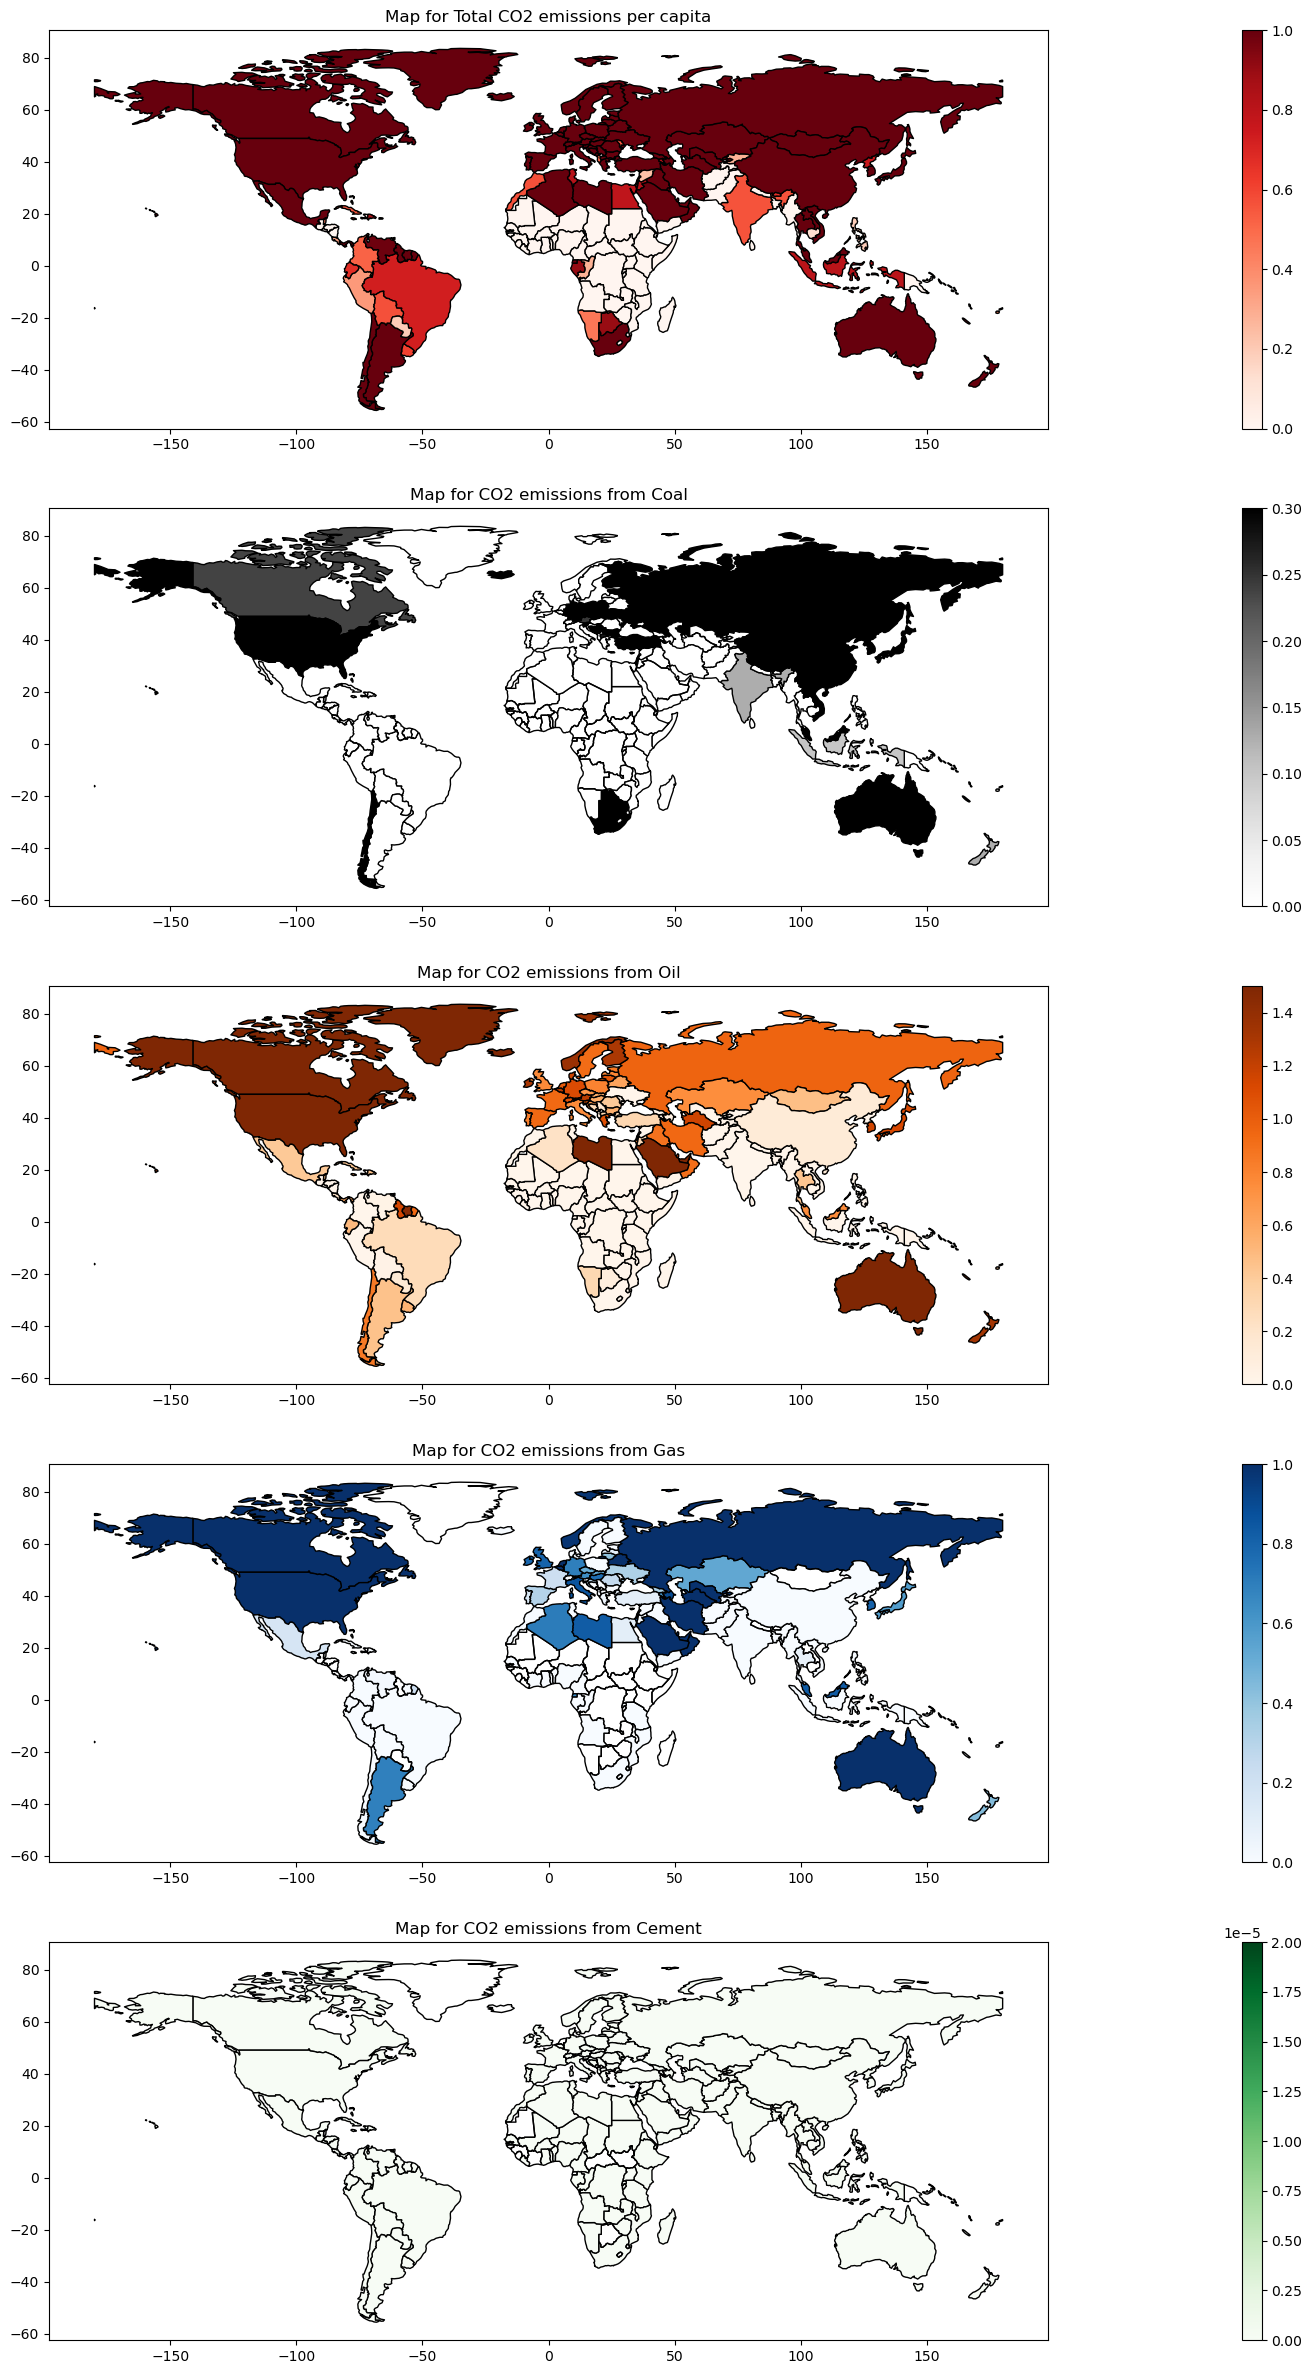

In [49]:
# plot the continent
fig, ax = plt.subplots(5, 1, figsize = (50,30))
ax = ax.ravel()

world.plot(
    ax=ax[0], edgecolor='black', column='logTotal', legend=True, cmap='Reds',
    vmin=0, vmax=1 #range of your column value for the color legend
)
ax[0].set_title('Map for Total CO2 emissions per capita')

world.plot(
    ax=ax[1], edgecolor='black', column='logCoal', legend=True, cmap='Greys',
    vmin=0, vmax=0.3 #range of your column value for the color legend
)
ax[1].set_title('Map for CO2 emissions from Coal')

world.plot(
    ax=ax[2], edgecolor='black', column='logOil', legend=True, cmap='Oranges',
    vmin=0, vmax=1.5 #range of your column value for the color legend
)
ax[2].set_title('Map for CO2 emissions from Oil')

world.plot(
    ax=ax[3], edgecolor='black', column='logGas', legend=True, cmap='Blues',
    vmin=0, vmax=1 #range of your column value for the color legend
)
ax[3].set_title('Map for CO2 emissions from Gas')

world.plot(
    ax=ax[4], edgecolor='black', column='logCement', legend=True, cmap='Greens',
    vmin=0, vmax=0.00002 #range of your column value for the color legend
)
ax[4].set_title('Map for CO2 emissions from Cement')


# pass co2 emissions as the data to color
plt.show()

Above, are Maps of the world with gradients in each representing values of different variables. 


- GDP Per Capita map: In this map, we see that countries with the highest GDP are mainly in North America and Europe, with some in Australia, Asia and South America.


- Total per capita emissions: In this map we see that countries with the highest total emissions per capita are similar to countries with high GDP per capita, they are mainly in North America and Europe, with some in Australia and Asia. The main difference we see is in Chile and Argentina which seem to have a relatively lower level of Total emissions per capita. 


- Coal per capita emissions: This map is almost identical to the Total per capita emissions, with the few differences being between South Africa and Saudi Arabia. South Africa seems to produce relatively higher Coal emissions per capita, whereas Saudi Arabia seems to produce relatively lower level of Coal emissions per capita. 


- Oil per capita emissions: This map looks very different, we see that North American countries and Saudi Arabia use large levels of oil, however, most other countries have relatively low levels of Oil emissions per capita. 


- Gas per capita emissions: This map is roughly similar to Coal and Total emissions, with the main differences being China, Mongolia and Kazakhstan, which all seem to have relatively much lower Gas emissions per capita. 


- Cement per capita emissions: This map tells us that emissions are low across the world, however, we do see that compared to the rest of the world Saudi Arabia and China produce relatively more. 


Findings - 


- We see that the Map for GDP per capita and Total emissions per capita are very similar, therefore confirming our hypothesis that these two variables have a positive relationship. However, there are a few outliers, like Argentina and a few European countries.


- The Map for Gas and Coal is also very similar to the GDP variable(except for some outliers), confirming what the scatterplots and histograms above told us about their relationship.


- The Map for Oil has some similarities, however, we do see a difference in countries in Asia and South America


Therefore, these maps confirm our hypothesis and findings in the above graphs. 


# Project 3

## Potential Data to Scrape

Throughout this Paper I have Explored to relationship between GDP per capita and CO2 emissions from a country, and to further see the difference between developed and developing countries. Over hear GDP per capita acts as an indicator of developement. However, GDP per capita is not an accurate measure of developement. I would like to look at Human Developement Index (HDI) of all these countries. The HDI includes measures of standard of living, health as well as education. This makes it a better indicator of development as it provides us with a better picture of progress, mainly because a country can have a high level of poverty, but if there are few indivuals with large wealth, we may still see a high GDP per capita, therefore not painting the full picture. 

Therefore, I would like to see whether there is a relationship between HDI and emissions per capita. This would help us expand our research as see the difference between total per capita $CO_2$ emissios between developed and developing countries more clearly.

A website that I can scrape this data from is https://www.theglobaleconomy.com/rankings/human_development/. It has information of the HDI of all countries for the year 2021 as well as HDI ranking. I will be using a HTML-based scrape to scrape this website

I would merge the 2020 HDI results with my 2020 dataset for per capita emissions and GDP per capita, to see If we see the relationship between emissions and HDI. As I mentioned, my research has been using GDP per capita as a measure of the development level of a country. While GDP per capita can to some extent represent this, it has its own limitations. Therefore, adding HDI to this would allow me to expand on this research and have a better understanding on the relationship of the development level of a country and the amount of emissions it produces. 

## Potential Challenges

I faced no problems when scrapping this website for data. However, the main problem I face is combing this data with my original dataset. This is because the data on the website https://www.theglobaleconomy.com/rankings/human_development/ does not have an iso code along with it. An ISO cose is a three letter code to Identify a country. I was however, unable to find a website that had ISO codes as well as HDI values.

Therefore, this creates some problems, as often the names of countries are different across different websites and dataframes, this may lead to some loss of information and requires a more code in order to manipulate the dataset, to change the names of countries, so that I can merge them efficiently for it to make sense. 

I do use this webstite to scrape data from and after merging the data with my original dataset, I look at countries with missing values for HDI, and change their names so that there is no missing information. This will help expand the analysis of my research question. 

Another problem is that the website only has HDI values for 2020, therefore we have very limited data points compared to GDP per capita, making our analysis of the results much harder

## Scraping Data from a website

In [50]:
web_url = 'https://www.theglobaleconomy.com/rankings/human_development/' # URL of the website that I am scrapping 
response = requests.get(web_url) # Requesting a web server for the content in the URL 

# The response html code is parsed through the beautiful soup function in order to get a much more structured form.
soup_object = BeautifulSoup(response.content) 

#Finding the code for the table with the information that we want to scrape from the website
data_table = soup_object.find_all('table','sortable')[0]

# finding all the rows in the table of information and storing it in a table
all_values = data_table.find_all('tr')

In [51]:
# Creating a Dataframe with column names as follows
HDI = pd.DataFrame(columns = ['Country','HDI','Rank'])
ix = 0

# Creating a for loop that takes each row in the table and saves each value in the row into different variables
for row in all_values[1:]:
    values = row.find_all('td')
    
    name = values[0].text.strip('\n\r\t')
    HDI1 = values[1].text.strip('\n\r\t')
    rank = values[2].text.strip('\n\r\t')
    
    # adding the values in the variables to the dataframe.
    HDI.loc[ix] = [name, HDI1, rank]
    ix += 1

# Changing the name of countries, so that I can merge the Dataframes easily
HDI['Country'].replace({'Ivory Coast': "Côte d'Ivoire"}, inplace=True)
HDI['Country'].replace({'Solomon Isl.': "Solomon Islands"}, inplace=True)
HDI['Country'].replace({'Papua N.G.': "Papua New Guinea"}, inplace=True)
HDI['Country'].replace({'DR Congo': "Democratic Republic of the Congo"}, inplace=True)
HDI['Country'].replace({'Burma': "Myanmar"}, inplace=True)
HDI['Country'].replace({'G.-Bissau': "Guinea-Bissau"}, inplace=True)
HDI['Country'].replace({'Micronesia': "Micronesia (Federated States of)"}, inplace=True)
HDI['Country'].replace({'S.T.&Principe': "Sao Tome and Principe"}, inplace=True)
HDI['Country'].replace({'Eq. Guinea': "Equatorial Guinea"}, inplace=True)
HDI['Country'].replace({'C.A. Republic': "Central African Republic"}, inplace=True)
HDI['Country'].replace({'Vietnam': "Viet Nam"}, inplace=True)
HDI['Country'].replace({'Palestine': "Occupied Palestinian Territory"}, inplace=True)
HDI['Country'].replace({'Bosnia & Herz.': "Bosnia and Herzegovina	"}, inplace=True)
HDI['Country'].replace({'Domin. Rep.': "Dominican Republic"}, inplace=True)
HDI['Country'].replace({'Brunei': "Brunei Darussalam"}, inplace=True)
HDI['Country'].replace({'Tr.&Tobago': "Trinidad and Tobago"}, inplace=True)
HDI['Country'].replace({'Bosnia and Herzegovina\t': "Bosnia and Herzegovina"}, inplace=True)
HDI['Country'].replace({'Czechia': "Czech Republic"}, inplace=True)
HDI['Country'].replace({'UA Emirates': "United Arab Emirates"}, inplace=True)
HDI['Country'].replace({'UK': "United Kingdom"}, inplace=True)

HDI.head()

Country    HDI Rank
0  Switzerland  0.962    1
1       Norway  0.961    2
2      Iceland  0.959    3
3    Hong Kong  0.952    4
4    Australia  0.951    5


In order to scrape a website for data, my first step is to save the URL of the website ('https://www.theglobaleconomy.com/rankings/human_development/') as an object and then request a web server for the content in the URL. This gives us an output that is very hard to read, so then the response HTML code from the request is parsed through the beautiful soup function in order to get a much more structured form.

We then search for the code for the table with HDI values from the website, and then we find all the rows of the table and store it in a new table.

We then create a blank Dataframe with column names - Country, HDI and Rank, as this is the information that we want to take from the table on the website we scrapped. We then create a for loop that takes each row in the table and saves each value in the row into different columns(variables) in the data frame. 

After the for loop is done, we now have a dataframe of the HDI values of different countries scrapped from 'https://www.theglobaleconomy.com/rankings/human_development/'


## Merging the Scraped Dataset

In [52]:
df_2020 = df[df["Year"]==2020]
df_2020 = df_2020.merge(HDI, left_on="Country", right_on="Country", how="inner")


I chose to merge the HDI dataset with the 2020 values in the original dataset. This is mainly because the HDI dataset only contains values from 2020. It will also help us compare Total per capita emissions and other pollutants with HDI.

After inner merging my dataset now has 181 observations compared to 184 before, this is because there are 3 values for countries in the original dataset that aren't present in the HDI data frame, therefore, decreasing the number of observations to 181. 


## Visualizing the Scraped Dataset

**Distribuition of HDI values**

Text(0, 0.5, 'Frequency')

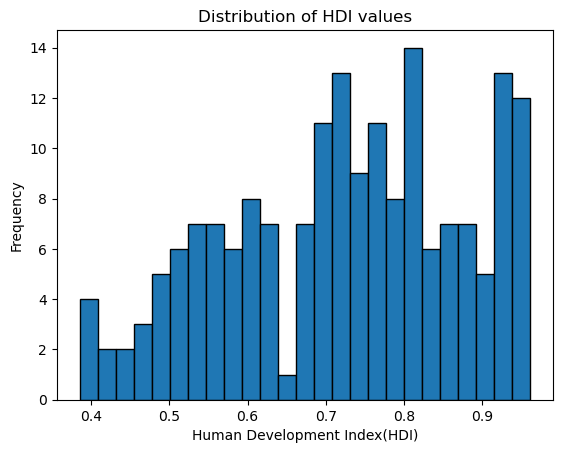

In [53]:
df_2020["HDI"] = df_2020["HDI"].astype(float)

df_2020.hist(column="HDI", bins = 25,edgecolor = 'black', grid=False)
plt.title('Distribution of HDI values')
plt.xlabel('Human Development Index(HDI)')
plt.ylabel("Frequency")

With this distribution of HDI values, we can already see how different it is from the other variables we have looked at so far. The data is slightly left skewed, if not centred at the mean. This is very different, as all the other variables were right-skewed, this may therefore give us very different results. 

This is good for our analysis as it ensures that we have enough observations for all HDI values, to ensure that we can obtain a statistically significant result.



**Scatterplots of HDI values against $CO_2$ emissions of different Fossil fuels**

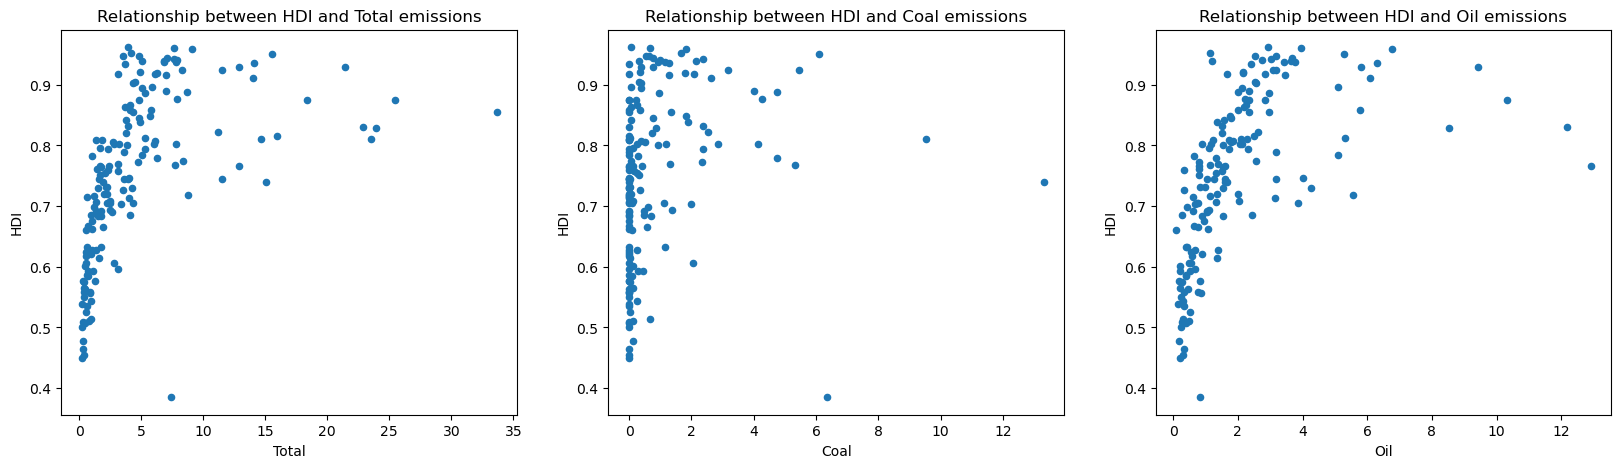

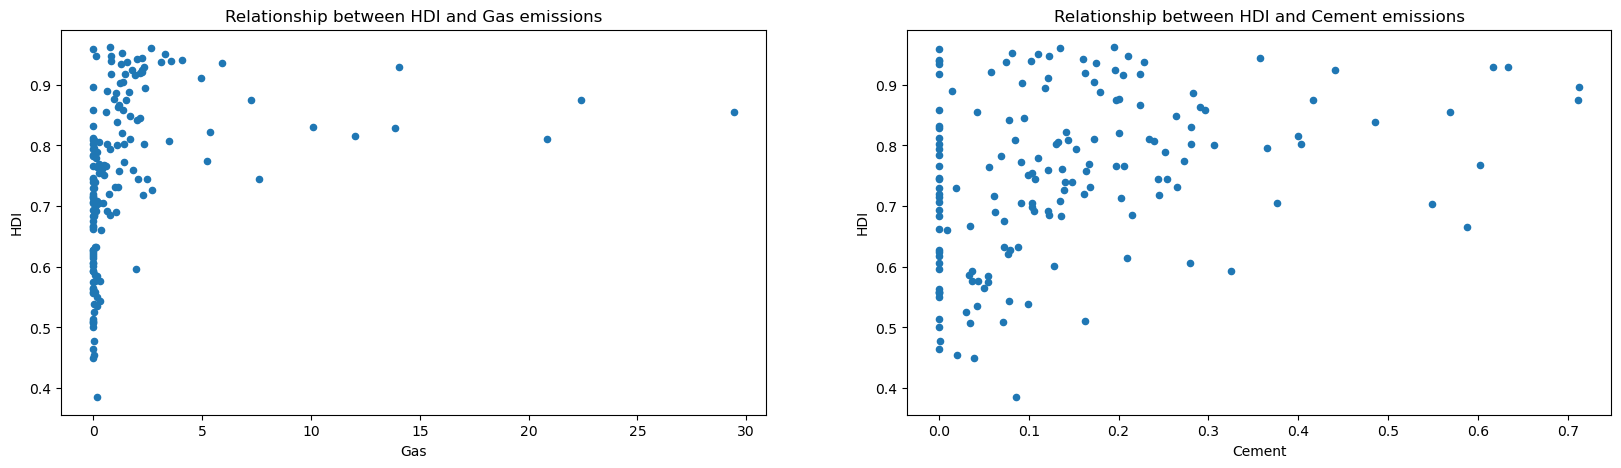

In [54]:
fig, axes = plt.subplots(1, 3, figsize=(20, 5))
axe = axes.ravel()
q1 = df_2020["Total"].quantile(0.90) # filtering outliers and clustered values at the origin
q2 = df_2020["Total"].quantile(0.10) 
df2 = df_2020[df_2020["Total"] < q1]

df2 = df_2020[df_2020["Total"] > q2]

df2.plot.scatter(ax=axe[0], x = "Total", y = "HDI", title = "Relationship between HDI and Total emissions")
df2.plot.scatter(ax=axe[1], x = "Coal", y = "HDI", title = "Relationship between HDI and Coal emissions")
df2.plot.scatter(ax=axe[2], x = "Oil", y = "HDI", title = "Relationship between HDI and Oil emissions");

fig, axes = plt.subplots(1, 2, figsize=(20, 5))
axe = axes.ravel()

df2.plot.scatter(ax=axe[0], x = "Gas", y = "HDI", title = "Relationship between HDI and Gas emissions")
df2.plot.scatter(ax=axe[1], x = "Cement", y = "HDI", title = "Relationship between HDI and Cement emissions");


By looking at these graphs, there seems to be a non-linear relationship between the variables in all the graphs, but it is hard to tell. They do however seem to have a positive relationship. This maybe due to the limits of HDI being on a scale of 0 to 1. 

To visualize this relationship better, we plot the log of the X variables against HDI to try and establish a relationship between the variables and figure out the true non-linear relationship between them. 


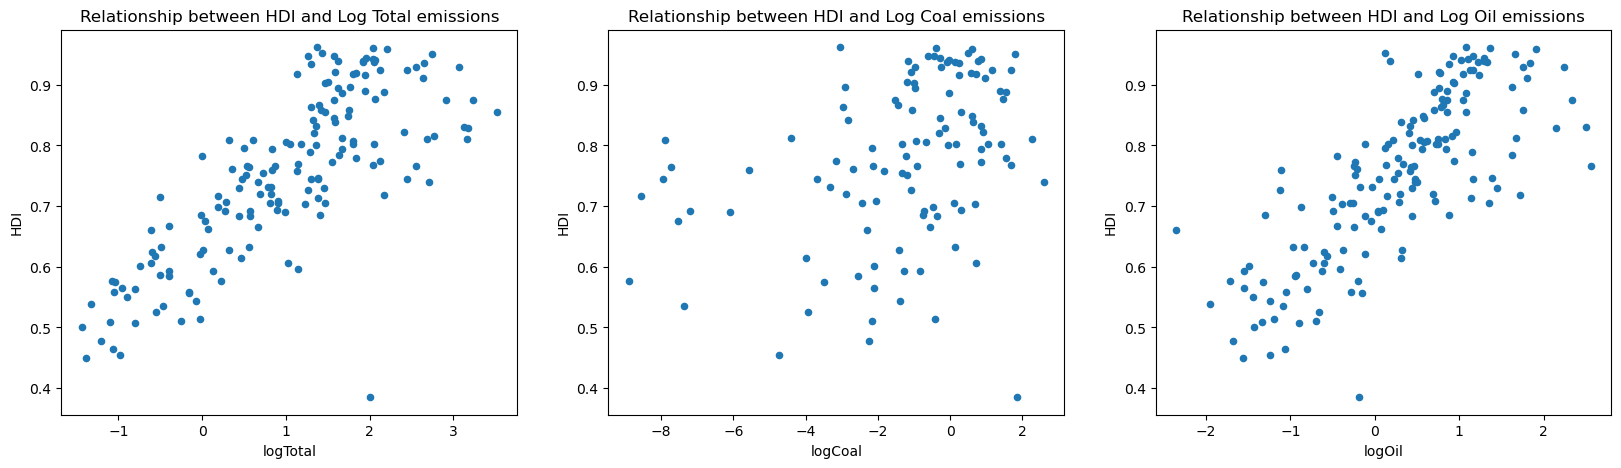

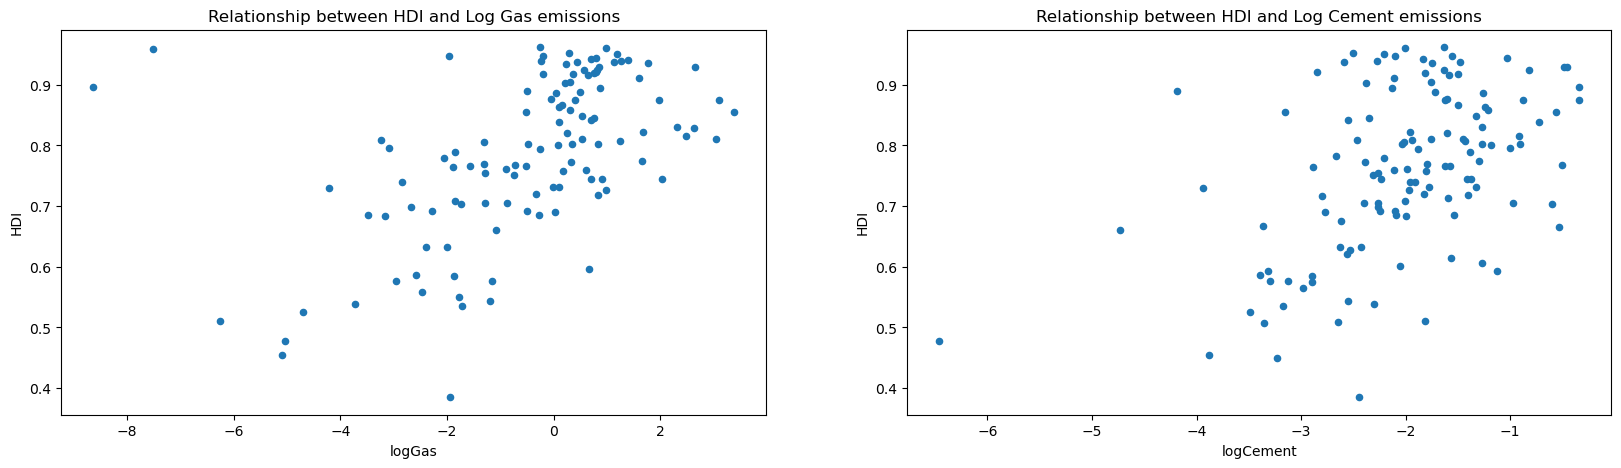

In [55]:
fig, axes = plt.subplots(1, 3, figsize=(20, 5))
axe = axes.ravel()
q1 = df_2020["Total"].quantile(0.90) # filtering outliers and clustered values at the origin
q2 = df_2020["Total"].quantile(0.10) 
df2 = df_2020[df_2020["Total"] < q1]

df2 = df_2020[df_2020["Total"] > q2]

df2.plot.scatter(ax=axe[0], x = "logTotal", y = "HDI", title = "Relationship between HDI and Log Total emissions")
df2.plot.scatter(ax=axe[1], x = "logCoal", y = "HDI", title = "Relationship between HDI and Log Coal emissions")
df2.plot.scatter(ax=axe[2], x = "logOil", y = "HDI", title = "Relationship between HDI and Log Oil emissions");

fig, axes = plt.subplots(1, 2, figsize=(20, 5))
axe = axes.ravel()

df2.plot.scatter(ax=axe[0], x = "logGas", y = "HDI", title = "Relationship between HDI and Log Gas emissions")
df2.plot.scatter(ax=axe[1], x = "logCement", y = "HDI", title = "Relationship between HDI and Log Cement emissions");


From this, we see a very clear positive relationship between all the variables and HDI. The least obvious is between HDI and the log of Coal per capita emissions.

For us to be sure of this relationship, and get a better understanding, we would have to run regressions and get OLS estimates of our parameters to see the true relationship, as it is hard to determine from the scatterplots.


**Maps of HDI values, GDP per capita and Total emissions**

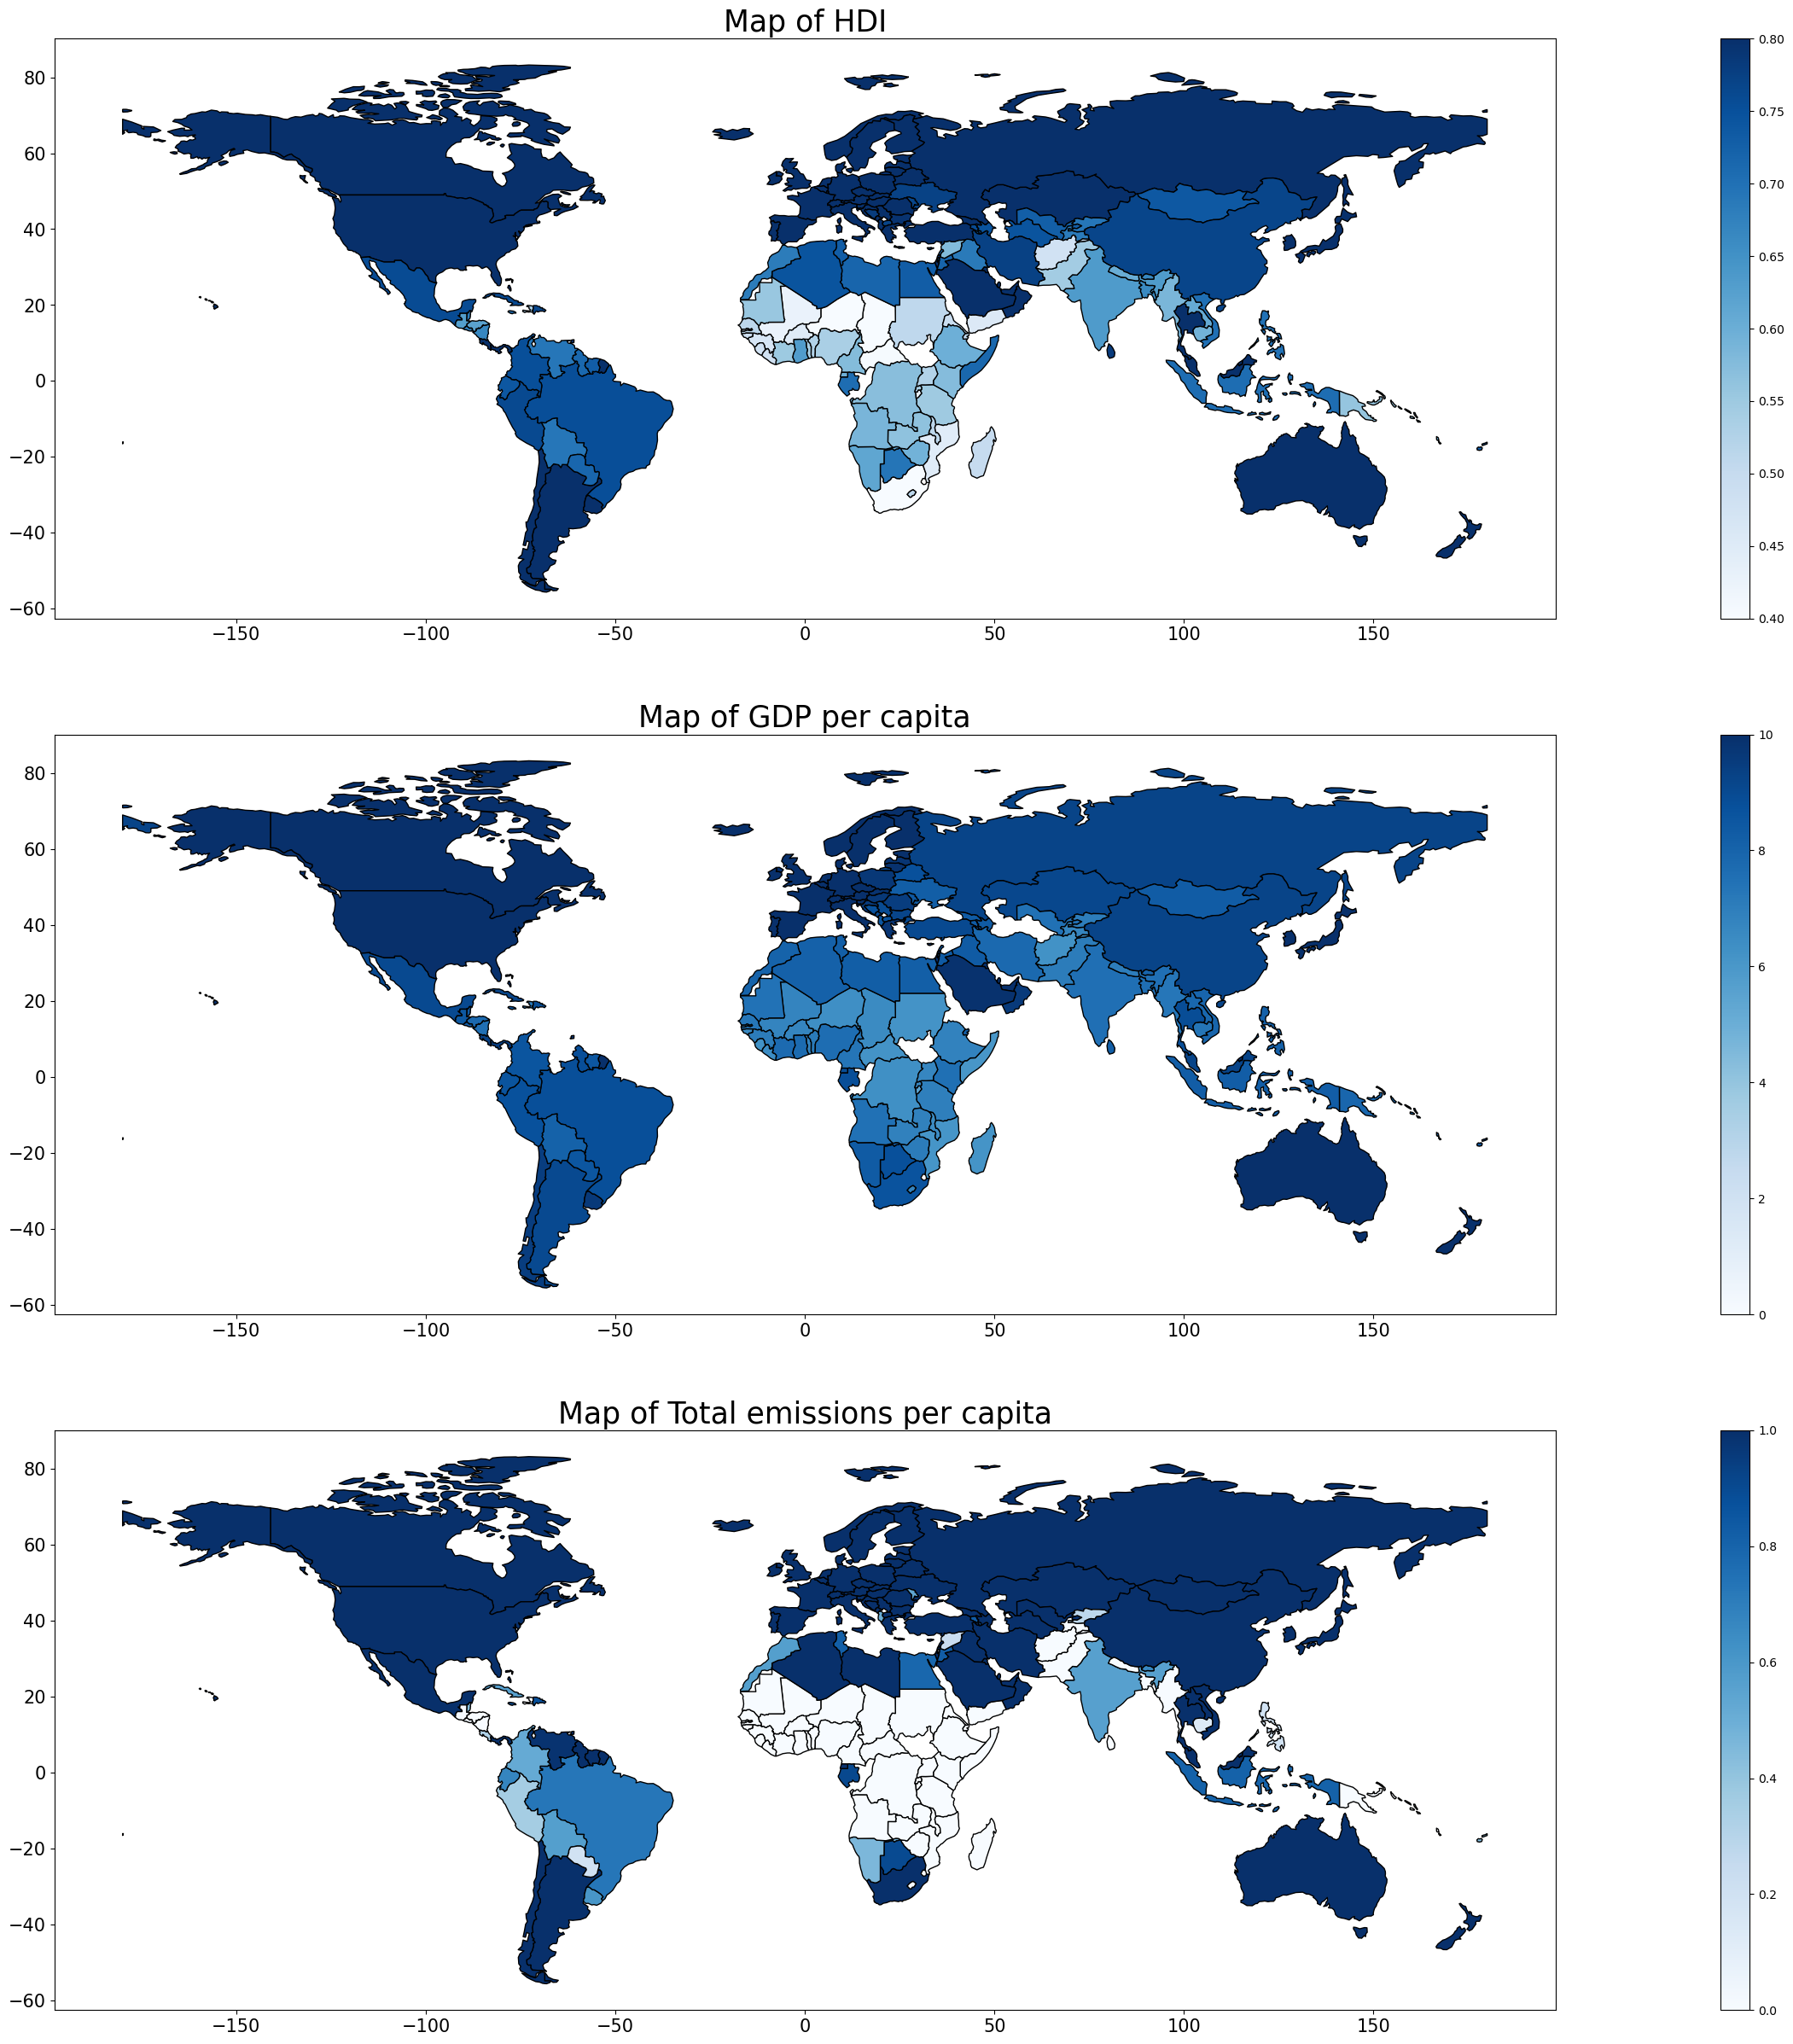

In [56]:
world = gpd.read_file(gpd.datasets.get_path("naturalearth_lowres"))
world = world.merge(df_2020, left_on="iso_a3", right_on="ISO 3166-1 alpha-3", how="outer")
#world = world.drop("ISO 3166-1 alpha-3", axis='columns')
# plot the continent
fig, gax = plt.subplots(3, 1, figsize = (50,30))
world.plot(
    ax=gax[0], edgecolor='black', column='HDI', legend=True, cmap='Blues',
    vmin=0.4, vmax=0.8
)
world.plot(
    ax=gax[1], edgecolor='black', column='logGDP', legend=True, cmap='Blues',
    vmin=0, vmax=10
)
world.plot(
    ax=gax[2], edgecolor='black', column='logTotal', legend=True, cmap='Blues',
    vmin=0, vmax=1
)
gax[0].set_title('Map of HDI',fontsize = 25)
gax[1].set_title('Map of GDP per capita',fontsize = 25)
gax[2].set_title('Map of Total emissions per capita',fontsize = 25)
    
for x in gax:
    x.tick_params(axis='x', labelsize=15)
    x.tick_params(axis='y', labelsize=15)

plt.show()

While looking at the maps, we see that all the graphs look very similar, showing us that there is a similarity between HDI and GDP per capita, as well as HDI and Total emissions per capita. Therefore, telling us that HDI does affect the Total per capita emissions of a country. 

There are however several outliers in South America, which have a relatively high HDI value, but not a very high GDP per capita value. We also see the same thing for countries like Ukraine, North African countries as well as southeast Asian countries. 

This tells us that the HDI and GDP per capita values tell give us different indications of which country is more developed. 

However, the similarity between HDI and Total per capita emissions isn't as strong and obvious as the relationship between GDP per capita and Total per capita emissions. 

This tells us that there me a stronger causality between Total per capita emissions and GDP per capita than with HDI.

This may mainly be because countries with high GDP per capita, imply that they are on average producing a higher quantity of goods which directly leads to higher CO2 emissions, compared to HDI which, also includes factors like Health and education, which do not directly affect CO2 emissions. 


## Adding a New Dataset


In order to explore my dataset more, I will be looking at the forest cover in all of these countries. This is because forests and trees are very important in combating CO2 emissions. Therefore, this will help assess the severity of the problem caused by these emissions. If there is a negative relationship between forest cover and CO2 emissions, that means that we do not have enough trees to help us combat the problems we are creating, and if not, we are moving a step closer to solving this problem. Therefore, I will be looking more into the relationship between forest cover and emissions. 

The dataset also includes values on Population density, which I believe might be an interesting variable to observe as a majority of pollution arises from cities, so It would be great to see if that affects per capita emissions. 


In [57]:
forest_cover = pd.read_csv("forest-cover-v1.csv")
forest_cover = forest_cover.drop(forest_cover.iloc[:,[2,3,7,8]], axis = 1)
forest_cover = forest_cover.drop(forest_cover.iloc[:,5:26], axis = 1)
df = pd.merge(df,forest_cover, how='left', left_on = 'ISO 3166-1 alpha-3', right_on = 'Country Code')
df = df.drop(columns = ["Country Code","Country Name"],axis = 1)

In [58]:
df1 = df[df["Year"] == 2011]
df1 = df1.drop(df1.iloc[:,19:], axis = 1) # drop all GDP values for years other than 2011
df1.rename(columns={"Forest Area 2011": "Forest coverage"}, inplace=True)# renaming the column

df2 = df[df["Year"] == 2012]# same as above but for 2012
df2 = df2.drop(df2.iloc[:,20:], axis = 1)
df2 = df2.drop(df2.iloc[:,[18]], axis = 1)
df2.rename(columns={"Forest Area 2012": "Forest coverage"}, inplace=True)

df3 = df[df["Year"] == 2013]
df3 = df3.drop(df3.iloc[:,21:], axis = 1)
df3 = df3.drop(df3.iloc[:,[18,19]], axis = 1)
df3.rename(columns={"Forest Area 2013": "Forest coverage"}, inplace=True)

df4 = df[df["Year"] == 2014]
df4 = df4.drop(df4.iloc[:,22:], axis = 1)
df4 = df4.drop(df4.iloc[:,18:21], axis = 1)
df4.rename(columns={"Forest Area 2014": "Forest coverage"}, inplace=True)

df5 = df[df["Year"] == 2015]
df5 = df5.drop(df5.iloc[:,23:], axis = 1)
df5 = df5.drop(df5.iloc[:,18:22], axis = 1)
df5.rename(columns={"Forest Area 2015": "Forest coverage"}, inplace=True)

df6 = df[df["Year"] == 2016]
df6 = df6.drop(df6.iloc[:,24:], axis = 1)
df6 = df6.drop(df6.iloc[:,18:23], axis = 1)
df6.rename(columns={"Forest Area 2016": "Forest coverage"}, inplace=True)

df7 = df[df["Year"] == 2017]
df7 = df7.drop(df7.iloc[:,25:], axis = 1)
df7 = df7.drop(df7.iloc[:,18:24], axis = 1)
df7.rename(columns={"Forest Area 2017": "Forest coverage"}, inplace=True)

df8 = df[df["Year"] == 2018]
df8 = df8.drop(df8.iloc[:,26:], axis = 1)
df8 = df8.drop(df8.iloc[:,18:25], axis = 1)
df8.rename(columns={"Forest Area 2018": "Forest coverage"}, inplace=True)

df9 = df[df["Year"] == 2019]
df9 = df9.drop(df9.iloc[:,27:], axis = 1)
df9 = df9.drop(df9.iloc[:,18:26], axis = 1)
df9.rename(columns={"Forest Area 2019": "Forest coverage"}, inplace=True)

df10 = df[df["Year"] == 2020]
df10 = df10.drop(df10.iloc[:,28:], axis = 1)
df10 = df10.drop(df10.iloc[:,18:27], axis = 1)
df10.rename(columns={"Forest Area 2020": "Forest coverage"}, inplace=True)

df = pd.concat([df1,df2,df3,df4,df5,df6,df7,df8,df9,df10]) # combining all the datasets for each individual year
df = df.sort_values(by=['Country','Year']) #sorting by Country then year in ascending order


**Histograms of Forest Coverage and population density**

Text(0.5, 0, 'Population Density(per kmÂ²)')

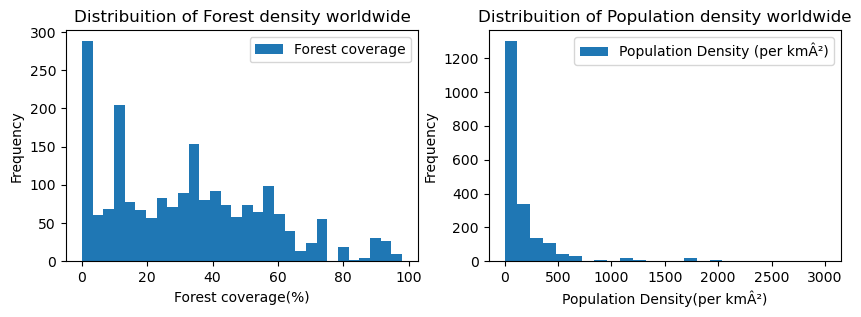

In [59]:
fig, axes = plt.subplots(1, 2, figsize=(10, 3))
axe = axes.ravel()

df.plot.hist(ax=axe[0], column="Forest coverage", range = [0,max(df["Forest coverage"])], bins = 30,title = "Distribuition of Forest density worldwide")
df.plot.hist(ax=axe[1], column="Population Density (per kmÂ²)", range = [0,3000], bins = 25,title = "Distribuition of Population density worldwide")

axe[0].set_xlabel('Forest coverage(%)')
axe[1].set_xlabel('Population Density(per kmÂ²)')


As we can see the distribution for both Forest coverage and Population density are right-skewed. However, Forest density is less skewed and has greater variability. 

This may affect our analysis, as we may not have enough information for countries with higher population densities. This may limit the accuracy of our results. 


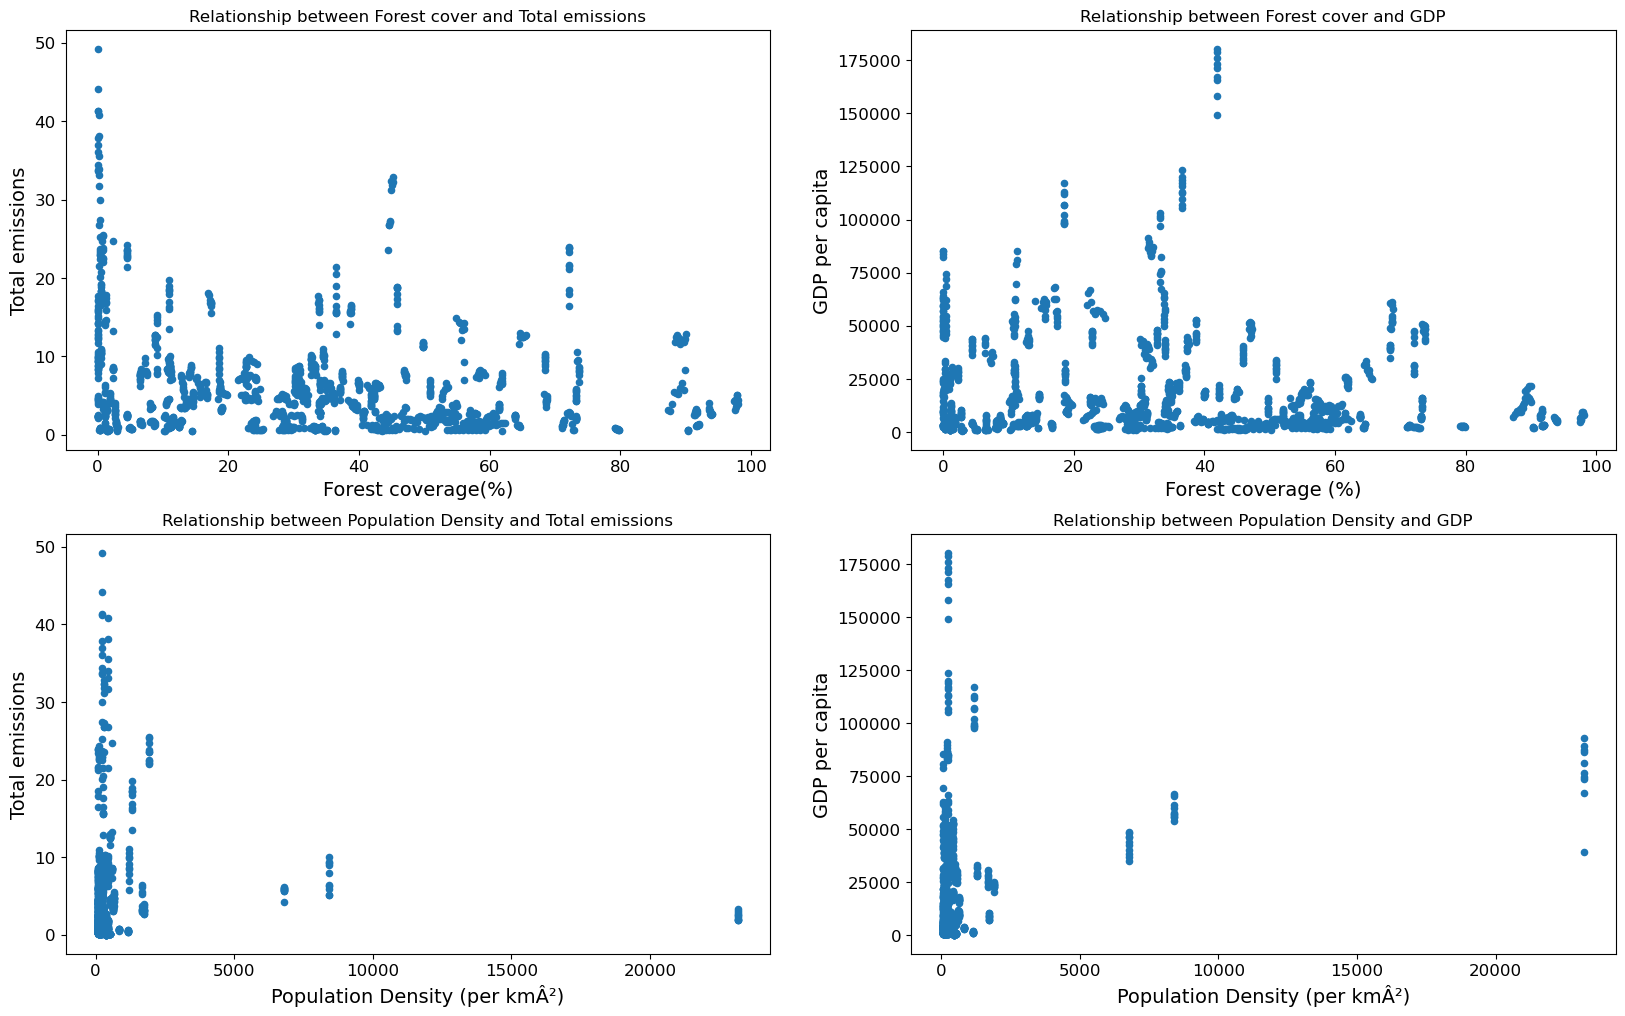

In [60]:
fig, axes = plt.subplots(2, 2, figsize=(20, 12))
axe = axes.ravel()

q1 = df["Total"].quantile(0.80) # filtering outliers and clustered values at the origin
q2 = df["Total"].quantile(0.20) 
df_out = df[df["Total"] < q1]
df_out = df[df["Total"] > q2]

q11 = df["Population Density (per kmÂ²)"].quantile(0.60) # filtering outliers and clustered values at the origin
q22 = df["Population Density (per kmÂ²)"].quantile(0.40)

df_pop = df[df["Population Density (per kmÂ²)"] < q11]
df_pop = df[df["Population Density (per kmÂ²)"] > q22]

df_out.plot.scatter(ax=axe[0], y = "Total", x = "Forest coverage", title = "Relationship between Forest cover and Total emissions")
df_out.plot.scatter(ax=axe[1], y = "GDP", x = "Forest coverage", title = "Relationship between Forest cover and GDP")
df_pop.plot.scatter(ax=axe[2], y = "Total", x = "Population Density (per kmÂ²)", title = "Relationship between Population Density and Total emissions")
df_pop.plot.scatter(ax=axe[3], y = "GDP", x = "Population Density (per kmÂ²)", title = "Relationship between Population Density and GDP");

axe[0].set_ylabel('Total emissions', fontsize = 14)
axe[1].set_ylabel('GDP per capita', fontsize = 14)
axe[2].set_ylabel('Total emissions', fontsize = 14)
axe[3].set_ylabel('GDP per capita', fontsize = 14)

axe[0].set_xlabel("Forest coverage(%)", fontsize = 14)
axe[1].set_xlabel("Forest coverage (%)", fontsize = 14)
axe[2].set_xlabel("Population Density (per kmÂ²)", fontsize = 14)
axe[3].set_xlabel("Population Density (per kmÂ²)", fontsize = 14)

for x in axe:
    x.tick_params(axis='x', labelsize=12)
    x.tick_params(axis='y', labelsize=12)

    

While looking at this distribution, we don't see any relationship between the variables at all. We see a slight negative relationship between total emissions and forest coverage, however, it is very hard to see this, and the only way to determine this for sure is to run an OLS regression to see if we get any statistically significant results. 

However, we see no relationship at all between population density and Total emissions, therefore, this variable may not be useful in order to explore this research question more.


In [61]:
world = gpd.read_file(gpd.datasets.get_path("naturalearth_lowres"))
df_2021 = df[df["Year"] == 2020]
df_2021 = df_2021.drop(df_2021.iloc[:,[0,2]], axis = 1)# filtering out "Year" and "Country" variables.
world = world.merge(df_2021, left_on="iso_a3", right_on="ISO 3166-1 alpha-3", how="inner")
world = world.drop("ISO 3166-1 alpha-3", axis='columns')

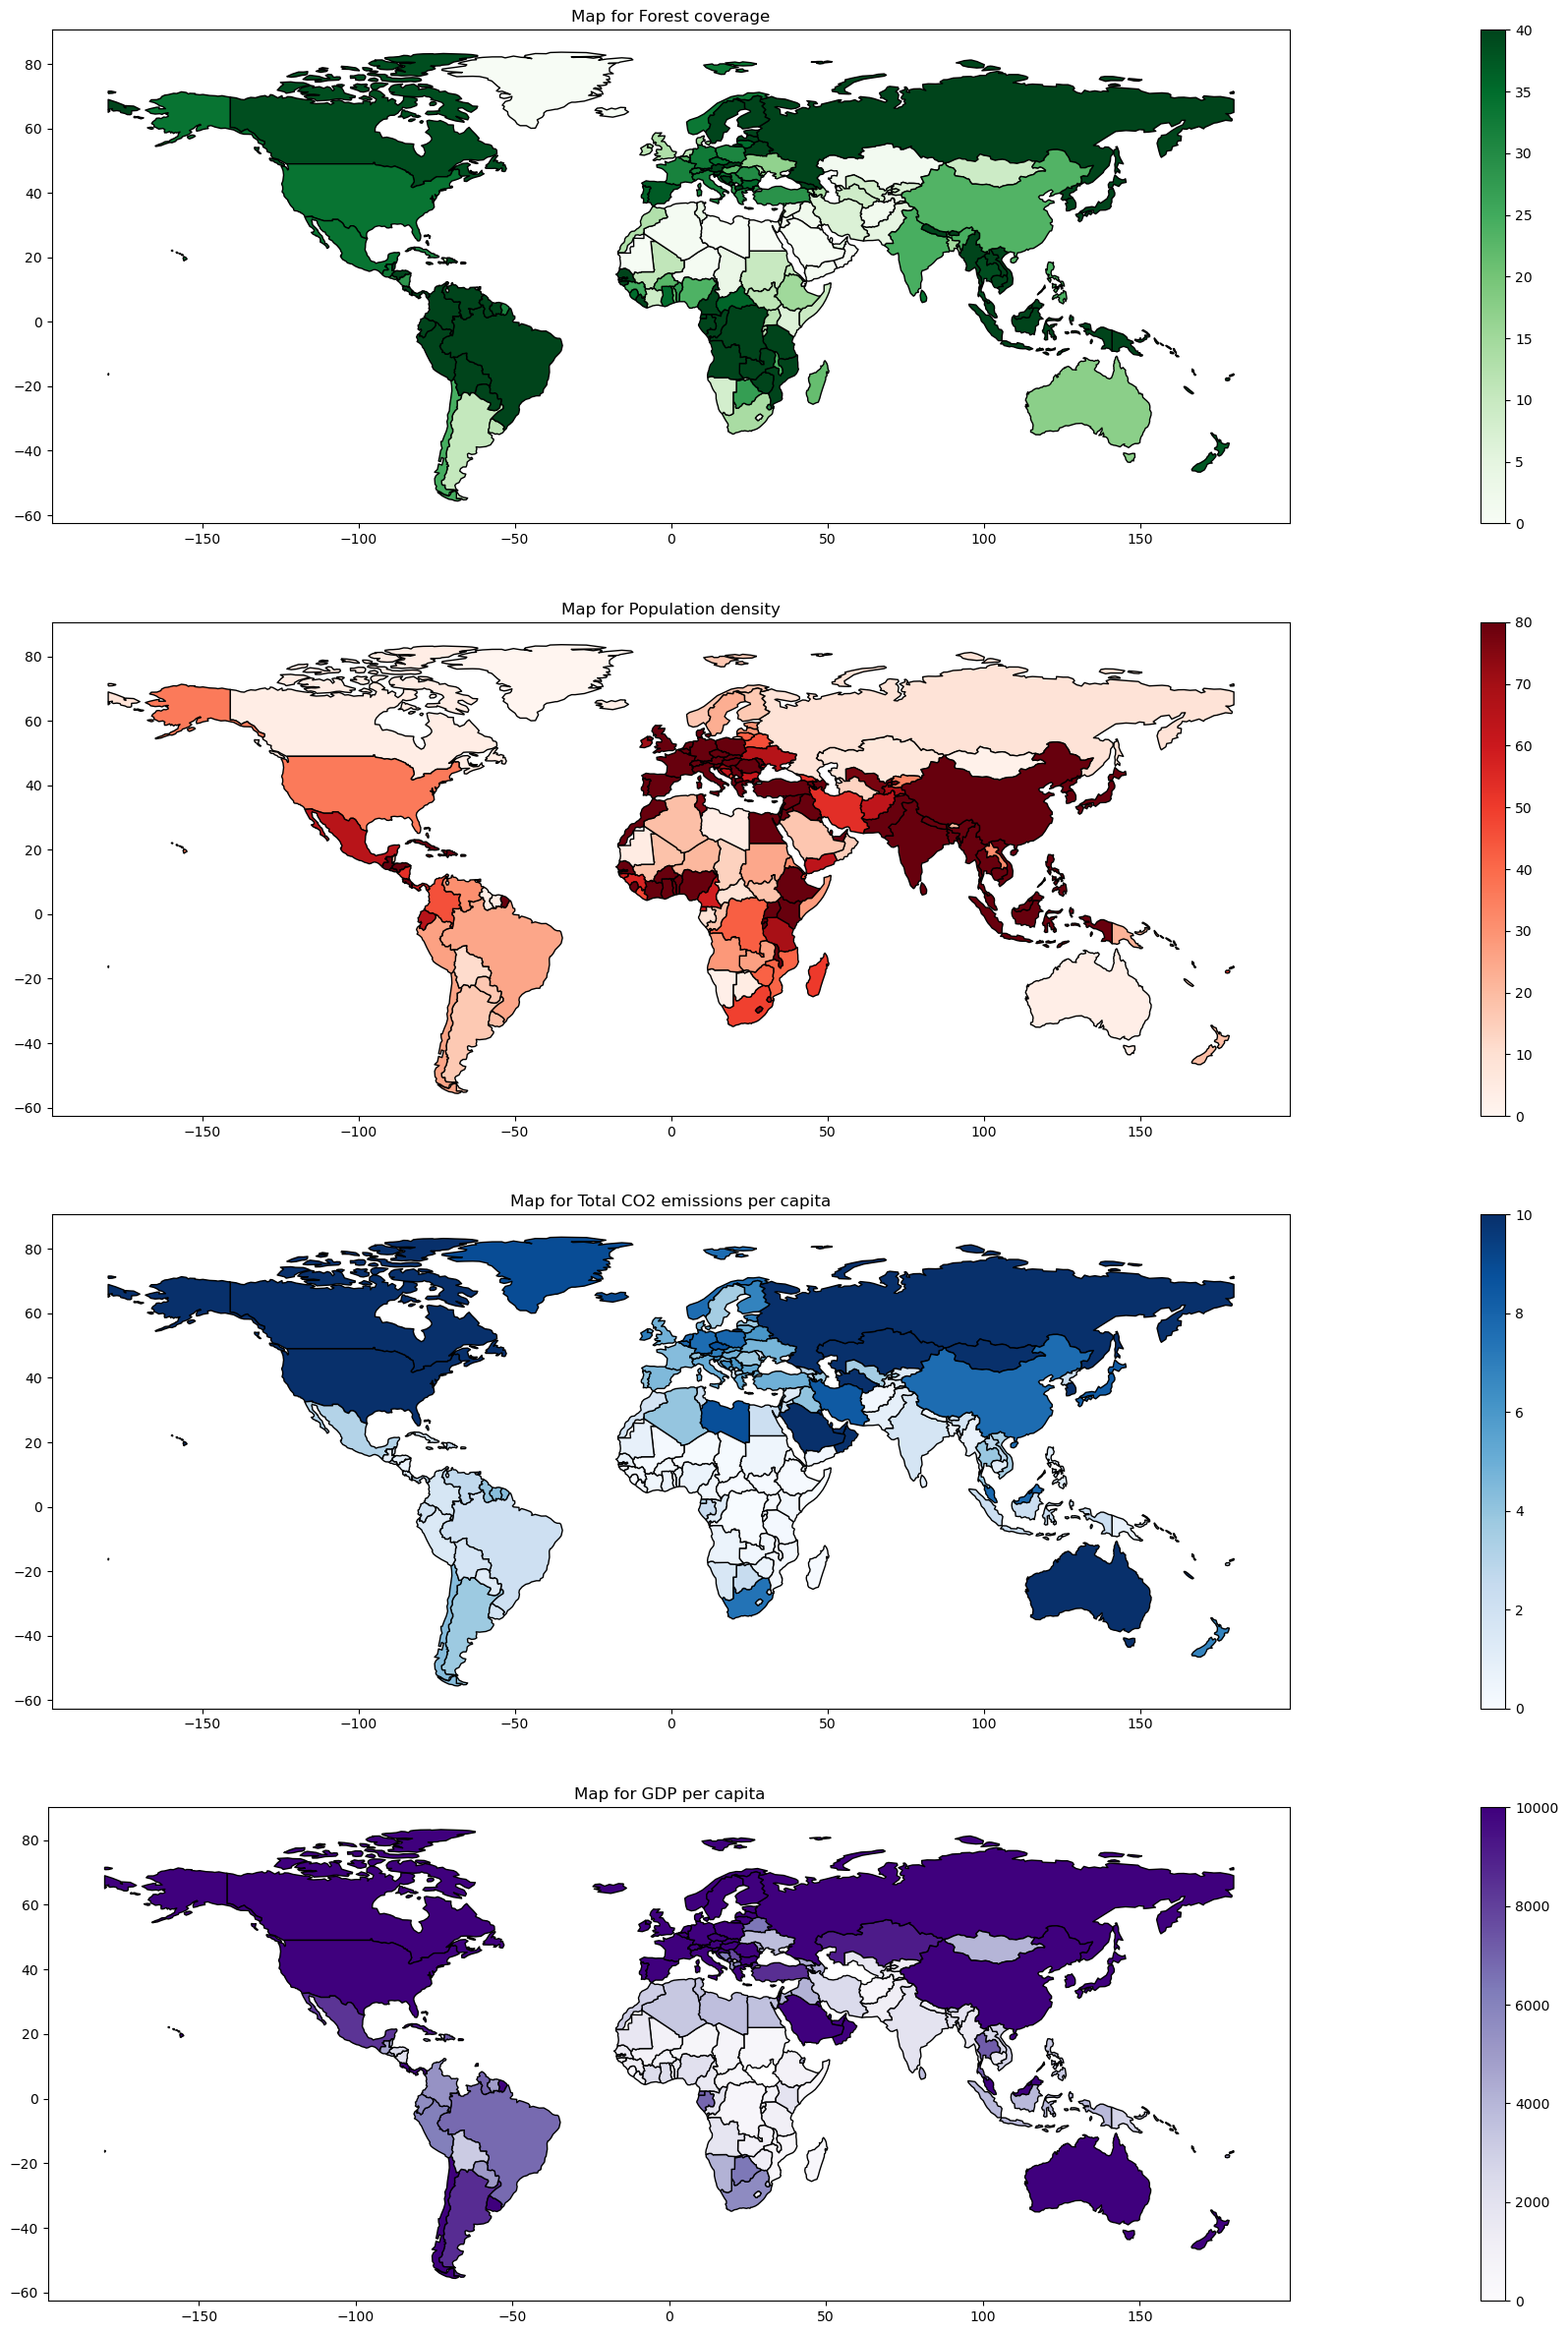

In [62]:
fig, ax = plt.subplots(4, 1, figsize = (50,30))
ax = ax.ravel()

world.plot(
    ax=ax[0], edgecolor='black', column='Forest coverage', legend=True, cmap='Greens',
    vmin=0, vmax=40 #range of your column value for the color legend
)
ax[0].set_title('Map for Forest coverage')

world.plot(
    ax=ax[1], edgecolor='black', column='Population Density (per kmÂ²)', legend=True, cmap='Reds',
    vmin=0, vmax=80
)
ax[1].set_title('Map for Population density')

world.plot(
    ax=ax[2], edgecolor='black', column='Total', legend=True, cmap='Blues',
    vmin=0, vmax=10 #range of your column value for the color legend
)
ax[2].set_title('Map for Total CO2 emissions per capita')

world.plot(
    ax=ax[3], edgecolor='black', column='GDP', legend=True, cmap='Purples',
    vmin=0, vmax=10000
)
ax[3].set_title('Map for GDP per capita')


plt.show()

In the above maps, the map for Total emissions and Forest coverage do have some similarities, mainly in North America and some parts of Europe. However, we see huge differences in South America, Central Africa and Asia. 
- We may not see a great forest covered in the rest of Africa, as Africa has large areas of open land.

The population density map is almost the opposite of the per capita emissions map. This may actually support our initial hypothesis, this is because Developing countries are generally associated with being more densely populated, and as we have established developing countries have relatively low levels of emissions per capita. However, there are a few outliers like South Korea.

Therefore, we might be seeing a negative relationship between Population density and Total per capita emissions, which can be explored further using OLS regressions. 


# Final Project

## OLS regression


By looking at my scatterplots for GDP per capita vs different fossil fuels, I believe that they have a positive non-linear relationship. The economic intuition behind this is that when countries have higher emissions, it usually means that there is an increase in production, which results in higher GDP per capita (development level).

While looking at the scatterplots between HDI and different fossil fuels, I believe that the relationship is non-linear (linear-log relationship). Since HDI is a better indicator of development as it includes variables other than GDP per capita, it helps us understand the relationship between increasing emissions and the development level. The results we see from the scatterplots are that a higher log emission level results in a higher HDI value of a country.


I think that the important X variables to look at in this linear regression would be the total emission and emissions of different fossil fuels (Coal, Oil, Gas, Cement and Total emissions) against the Y variable GDP per capita. It is also important to add controls such as forest cover and population density as controls so that we can reduce any omitted variable bias. But since these factors don't directly affect GDP per capita and are only controls, the coefficient value and their significance are not important to our analysis as the OLS estimator for the parameters of control variables is biased. 

I believe that we will see a positive non-linear relationship as higher emissions from these fossil fuels imply higher production levels which correlate with a higher level of GDP per capita. 

While looking at HDI I believe that we will see similar results to GDP per capita. I believe that the relationship between HDI and emissions will be more significant, and help support our main hypothesis. 

 

In [63]:
from statsmodels.iolib.summary2 import summary_col
info_dict1 = {'R-squared': lambda x: f"{x.rsquared:.2f}",
             'No. observations': lambda x: f"{int(x.nobs):d}",
             'MSE': lambda x: f"{x.mse_resid:.2f}"}
df['const'] = 1
df = df.replace([np.inf, -np.inf], np.nan).dropna()

# Create lists of variables to be used in each regression

X1 = ['const','logTotal']
X2 = ['const','logOil','logTotal']
X3 = ['const','logOil','logGas','logTotal']
X4 = ['const','logOil','logGas', 'logCoal','logTotal']
X5 = ['const','logOil','logGas', 'logCoal','logCement','logTotal']
X6 = ['const','logOil','logGas', 'logCoal','logCement','Forest coverage','Population Density (per kmÂ²)','Population Growth Rate','logTotal']
X7 = ['const','logOil','logGas', 'logCoal','logCement','Forest coverage','Population Density (per kmÂ²)','Population Growth Rate']
# Estimate an OLS regression for each set of variables
reg1 = sm.OLS(df['logGDP'], df[X1], missing='drop').fit()
reg2 = sm.OLS(df['logGDP'], df[X2], missing='drop').fit()
reg3 = sm.OLS(df['logGDP'], df[X3], missing='drop').fit()
reg4 = sm.OLS(df['logGDP'], df[X4], missing='drop').fit()
reg5 = sm.OLS(df['logGDP'], df[X5], missing='drop').fit()
reg6 = sm.OLS(df['logGDP'], df[X6], missing='drop').fit()
reg7 = sm.OLS(df['logGDP'], df[X7], missing='drop').fit()
results_table = summary_col(results=[reg1,reg2,reg3,reg4,reg5,reg6,reg7],
                            float_format='%0.2f',
                            stars = True,
                            model_names=['Model 1','Model 2','Model 3','Model 4','Model 5',
                                         'Model 6','Model 7'],
                            info_dict=info_dict1,
                            regressor_order=['const','Oil','Gas',
                                             'Coal','Cement','Total'])
results_table

<class 'statsmodels.iolib.summary2.Summary'>
"""

=========================================================================================
                              Model 1 Model 2 Model 3 Model 4  Model 5  Model 6  Model 7 
-----------------------------------------------------------------------------------------
const                         7.81*** 8.54*** 8.75*** 9.05***  8.70***  7.40***  7.25*** 
                              (0.04)  (0.04)  (0.06)  (0.07)   (0.10)   (1.21)   (1.14)  
Forest coverage                                                         0.01***  0.01*** 
                                                                        (0.00)   (0.00)  
Population Density (per kmÂ²)                                           0.00***  0.00*** 
                                                                        (0.00)   (0.00)  
Population Growth Rate                                                  0.82     0.93    
                                                                        (1.17)   (1.12)  
logCement                                                      -0.12*** -0.12*** -0.12***
                                                               (0.02)   (0.02)   (0.02)  
logCoal                                               0.06***  0.06***  0.03***  0.03*** 
                                                      (0.01)   (0.01)   (0.01)   (0.01)  
logGas                                        0.08*** 0.09***  0.08***  0.07***  0.06*** 
                                              (0.01)  (0.01)   (0.01)   (0.01)   (0.01)  
logOil                                1.06*** 1.11*** 1.21***  1.22***  1.20***  1.19*** 
                                      (0.04)  (0.04)  (0.04)   (0.04)   (0.04)   (0.03)  
logTotal                      1.03*** 0.14*** 0.01    -0.20*** -0.12**  -0.02            
                              (0.02)  (0.04)  (0.05)  (0.06)   (0.06)   (0.06)           
R-squared                     0.68    0.81    0.82    0.83     0.83     0.85     0.85    
R-squared Adj.                0.68    0.81    0.82    0.83     0.83     0.85     0.85    
R-squared                     0.68    0.81    0.82    0.83     0.83     0.85     0.85    
No. observations              878     878     878     878      878      878      878     
MSE                           0.57    0.33    0.32    0.31     0.30     0.27     0.27    
=========================================================================================
Standard errors in parentheses.
* p<.1, ** p<.05, ***p<.01
"""

In [64]:
stargazer = Stargazer([reg1, reg2, reg3,reg4,reg5,reg6,reg7])
#print(stargazer.render_html()) 

Above we run a regression of GDP against varying X variables. The first model is with log(Total) emissions per capita as our X variable, here we do see a parameter estimate that is significant at a 1% level and the adjusted $R^2$ value is about 0.680, which tells us that around 68% of the variance in values is explained by the model. We see this adjusted $R^2$ value increase as we include different types of fossil fuels to control for the fuel composition of different countries, such as X variables - Oil, Gas, Coal and Cement. We also as well as other factors such as forest coverage and population density and Population growth rate as controls in our regressions. Therefore, by including these variables we see an increase in the amount of total variance that is accounted for with the model increase from 68% to 84.6%, therefore we see a reduction in the omitted variable bias, from model 1 to 6.

In model 6, all the parameter estimates are significant at a 5% level and it has a much higher adjusted $R^2$ and Residual Std. Error compared to model 1. All the OLS parameter estimates are significant at a 1% significance level other than log(total). The insignificance of the log(Total) parameter estimate could be for a few reasons. While we added variables for individual fossil fuels to establish differences in the fossil fuel usage composition of a country, this may have led to imperfect collinearity between the variables when all the fossil fuels are added.

From this model, all our parameters except for log(total) and log(cement) have positive estimates, therefore an increase in these variables leads to an increase in the GDP per capita of a country. The negative OLS estimate for log(Total) is hard to interpret, as it means an increase in total emissions doesn't lead to an increase in GDP per capita, which is the opposite of what the scatterplots and data tell us. The negative value may be because a lot of the log values become negative as the original value is lesser than 1. However, it may also suggest that the usage composition of fossil fuels along with their individual usage levels is more important than just the total emission level and therefore we use model 7 which eliminates the log(Total) variable. This model has the same adjusted $R^2$ and Residual Std. Error as model 6 and is therefore our preferred model to explain the relationship between GDP per capita and emissions per capita. 

Our preferred model (model 7), compared to the other models has the highest adjusted $R^2$ value as well as the lowest Residual Std. Error, therefore overall is the best model. The model's adjusted $R^2$ value is also greater than 0.8, which is widely regarded as the base value to establish whether a model explains enough of the variance in the y variable.

Our final model is:

$\log(GDP) = \beta_0 + \beta_1\log(Coal) + \beta_2\log(Gas) + \beta_3\log(Oil) + \beta_4\log(Cement) + \beta_{5}ForestCover + \beta_{6}PopDensity + \beta_{7}PopGrowthRate$

An example of our interpretation of our OLS estimates as a 1% increase in Coal would result in a $\beta_1$% in GDP per capita, and is similar for other variables. 


In [65]:
from statsmodels.iolib.summary2 import summary_col
info_dict = {'R-squared': lambda x: f"{x.rsquared:.2f}",
             'No. observations': lambda x: f"{int(x.nobs):d}",
             'MSE': lambda x: f"{x.mse_resid:.2f}"}

# Add constant term to dataset
df_2020['const'] = 1
df_2020['Total2'] = np.log(df_2020["Total"])
df_2020 = df_2020.replace([np.inf, -np.inf], np.nan).dropna()

# Create lists of variables to be used in each regression
X1 = ['const','logTotal']
X2 = ['const','logTotal','logOil']
X3 = ['const','logTotal','logOil','logGas']
X4 = ['const','logTotal','logOil','logGas', 'logCoal']
X5 = ['const','logTotal','logOil','logGas',"logCoal",'logCement']


# Estimate an OLS regression for each set of variables
reg1 = sm.OLS(df_2020['HDI'], df_2020[X1], missing='drop').fit()
reg2 = sm.OLS(df_2020['HDI'], df_2020[X2], missing='drop').fit()
reg3 = sm.OLS(df_2020['HDI'], df_2020[X3], missing='drop').fit()
reg4 = sm.OLS(df_2020['HDI'], df_2020[X4], missing='drop').fit()
reg5 = sm.OLS(df_2020['HDI'], df_2020[X5], missing='drop').fit()


results_table = summary_col(results=[reg1,reg2,reg3,reg4,reg5],
                            float_format='%0.2f',
                            stars = True,
                            model_names=['Model 1',
                                         'Model 2',
                                         'Model 3',
                                         'Model 4',
                                         'Model 5'],
                            info_dict=info_dict,
                            regressor_order=['const',
                                             'Oil',
                                             'Gas',
                                             'Coal',
                                             'Cement',
                                             'Total'])
results_table

<class 'statsmodels.iolib.summary2.Summary'>
"""

========================================================
                 Model 1 Model 2 Model 3 Model 4 Model 5
--------------------------------------------------------
const            0.67*** 0.74*** 0.78*** 0.81*** 0.82***
                 (0.01)  (0.02)  (0.02)  (0.03)  (0.04) 
logCement                                        0.00   
                                                 (0.01) 
logCoal                                  0.01    0.01   
                                         (0.00)  (0.00) 
logGas                           0.02*** 0.02*** 0.02***
                                 (0.01)  (0.01)  (0.01) 
logOil                   0.10*** 0.11*** 0.12*** 0.12***
                         (0.02)  (0.02)  (0.02)  (0.02) 
logTotal         0.10*** 0.02    -0.01   -0.03   -0.03  
                 (0.01)  (0.02)  (0.02)  (0.02)  (0.02) 
R-squared        0.60    0.72    0.75    0.75    0.75   
R-squared Adj.   0.60    0.71    0.74    0.74    0.74   
R-squared        0.60    0.72    0.75    0.75    0.75   
No. observations 88      88      88      88      88     
MSE              0.01    0.01    0.00    0.00    0.00   
========================================================
Standard errors in parentheses.
* p<.1, ** p<.05, ***p<.01
"""

In [66]:
stargazer = Stargazer([reg1, reg2, reg3,reg4,reg5])
#print(stargazer.render_html()) 


Above we run a regression of HDI against varying X variables. The first model is with log(Total) emissions per capita as our X variable, here we do see a parameter estimate that is significant at a 1% level and the $R^2$ value is about 0.609. This tells us that around 60.4% of the variance in HDI values is explained by the model. We see this adjusted $R^2$ value increase as we include emissions from different fossil fuels such as - Oil, Gas, Coal and Cement. Therefore, by including these variables we see an increase in the variance accounted for with the model increase from 60.4% to 75.1%. We also see a reduction in Residual Std. Error from 0.083 to 0.066. Therefore, we see a reduction in the omitted variable bias, from model 1 to 5.

In model 5, the parameter estimates except for cement and Coal are significant at a 1% level and it has the largest adjusted $R^2$. But since, the parameter estimate for cement and Coal are not significant at even a 10% level, model 3 is our preferred model, as all the variables are significant and it also has the adjusted $R^2$ value of 0.751 and Residual Std. Error value of 0.066.

From this model, only our parameters for the total has a negative estimate. This suggests that an increase in emissions from Oil and Gas results in an increase in the HDI of a country, however an increase in Total emissions leads to a decrease in a slight decrease in the HDI of a country. The explanation remains the same for this model as it did for GDP per capita.

A way to interpret the results from this model is that a 10% increase in Gas emissions leads to a $\beta_2$*0.1 increase in HDI, which is significant, as HDI only ranges from 0 to 1.
 
Our preferred model (model 6), compared to the other models has a high adjusted $R^2$ value as well as the lowest Residual Std. Error, therefore overall is the best model.

Our Final Model is:

$HDI = \beta_0 + \beta_1\log(Oil) + \beta_2\log(Gas) +\beta_3\log(Total)$

From our results in the regression tables for GDP and HDI, our main takeaway is that higher emissions per capita is associated with a higher GDP per capita and a higher HDI. Therefore, in the context of our research question, these results confirm our hypothesis that more developed countries (those with higher GDP per capita / HDI) have higher emissions levels compared to less developed countries. These models have relatively high adjusted $R^2$ values, however it is hard to say what is good enough, we need to look at other analyses such as ANOVA to confirm this. 

While comparing our GDP regression model to the HDI model, we see that both models have high adjusted $R^2$ values as well as low residual std. errors. This makes it hard to compare which model is better. However, they both do support our hypothesis that more developed countries have higher emissions levels compared to less developed countries.


In [68]:
df['const'] = 1
iv = IV2SLS(dependent=df['logGDP'],
            exog=df['const'],
            endog=df['logTotal'],
            instruments=df['Population Growth Rate']).fit(cov_type='unadjusted')

print(iv.summary)

                          IV-2SLS Estimation Summary                          
Dep. Variable:                 logGDP   R-squared:                      0.6653
Estimator:                    IV-2SLS   Adj. R-squared:                 0.6649
No. Observations:                 878   F-statistic:                    163.36
Date:                Sun, Apr 16 2023   P-value (F-stat)                0.0000
Time:                        18:36:45   Distribution:                  chi2(1)
Cov. Estimator:            unadjusted                                         
                                                                              
                             Parameter Estimates                              
            Parameter  Std. Err.     T-stat    P-value    Lower CI    Upper CI
------------------------------------------------------------------------------
const          8.0123     0.0923     86.774     0.0000      7.8313      8.1932
logTotal       0.8784     0.0687     12.781     0.00


GDP and total emissions suffer from endogeneity issues, as an increase in GDP leads to an increase in emissions and an increase in emissions leads to an increase in GDP. Therefore, in order to deal with this problem we look at a two-stage least squares (2SLS) regression. We, therefore, look at a variable that correlates with total emissions and not GDP per capita. We therefore look at the population growth rate. Countries that have higher population growth rates may have higher total CO2 emissions due to increased demand for energy, however, this may not lead to higher GDP per capita if the economy is not productive. Therefore, we use the population growth rate as our instrument, which helps us remove the endogeneity in our regression.

By using the 2SLS regression. we see that the parameter estimate for Total emissions per capita is positive and is significant at a 1% significance level as it has a p-value of 0.0000. Our constant estimate is also significant. 

Therefore, even when accounting for causality, we see that an increase in total emissions results in an increase in GDP per capita - the development level of a country.


## Machine Learning

In [151]:
from sklearn import (
    linear_model, metrics, pipeline, model_selection
)
df = df.dropna()
X = df.drop(df.iloc[:,[0,1,2,3,4,5,6,7,8,9]], axis=1).copy()
for col in list(X):
    X[col] = X[col].astype(float)
y = np.log(df["logGDP"])
y = y.astype(float)

Over here the Objective function has log values of emissions, control variables - Forest coverage, Population density, Population growth rate, these are our X variables. Our Y variable in the objective function is log GDP.

Regularization parameters are used to prevent overfitting in models, this can occur when there are too many variables (very complex) and captures a lot of the random variation (noise) of values in the training data instead of general patterns in data.

The three regularization parameters are - minimum leaf size, maximum tree depth, and  𝛼. 

Minimum leaf size, restricts the minimum number of observations required to form a tree node. Therefore, a higher minimum leaf size results in a simpler model. Maximum Tree depth helps us prevent trees from growing too deep, which may result in overfitting. $\alpha$ is used to balance the tradeoff between the complexity of a tree and its ability to fit the data. Higher values of 𝛼 leads to simlpler trees, which are not likely to overfit in the data.

In [147]:
from sklearn import tree
GDP_tree = tree.DecisionTreeRegressor(max_depth=3).fit(X,y)

# use the fitted tree to predict
y_pred_tree = GDP_tree.predict(X)

# find the error of prediction (MSE)
from sklearn import metrics
print('Mean Squared Error:', metrics.mean_squared_error(y, y_pred_tree))


Mean Squared Error: 0.002718324019317105


You can see that mean squared error (mse) of a tree with depth of 3 is higher than our chosen model. However, this MSE is still very low and our previous model may have been overfitting to the training data, therefore wouldn't be good at predicting values. However, since the tree depth is at a max of 3, it is very unlikely that this model will overfit.

In [146]:
df = df.dropna()
# use the fitted tree to predict
y_pred_tree = GDP_tree.predict(X)


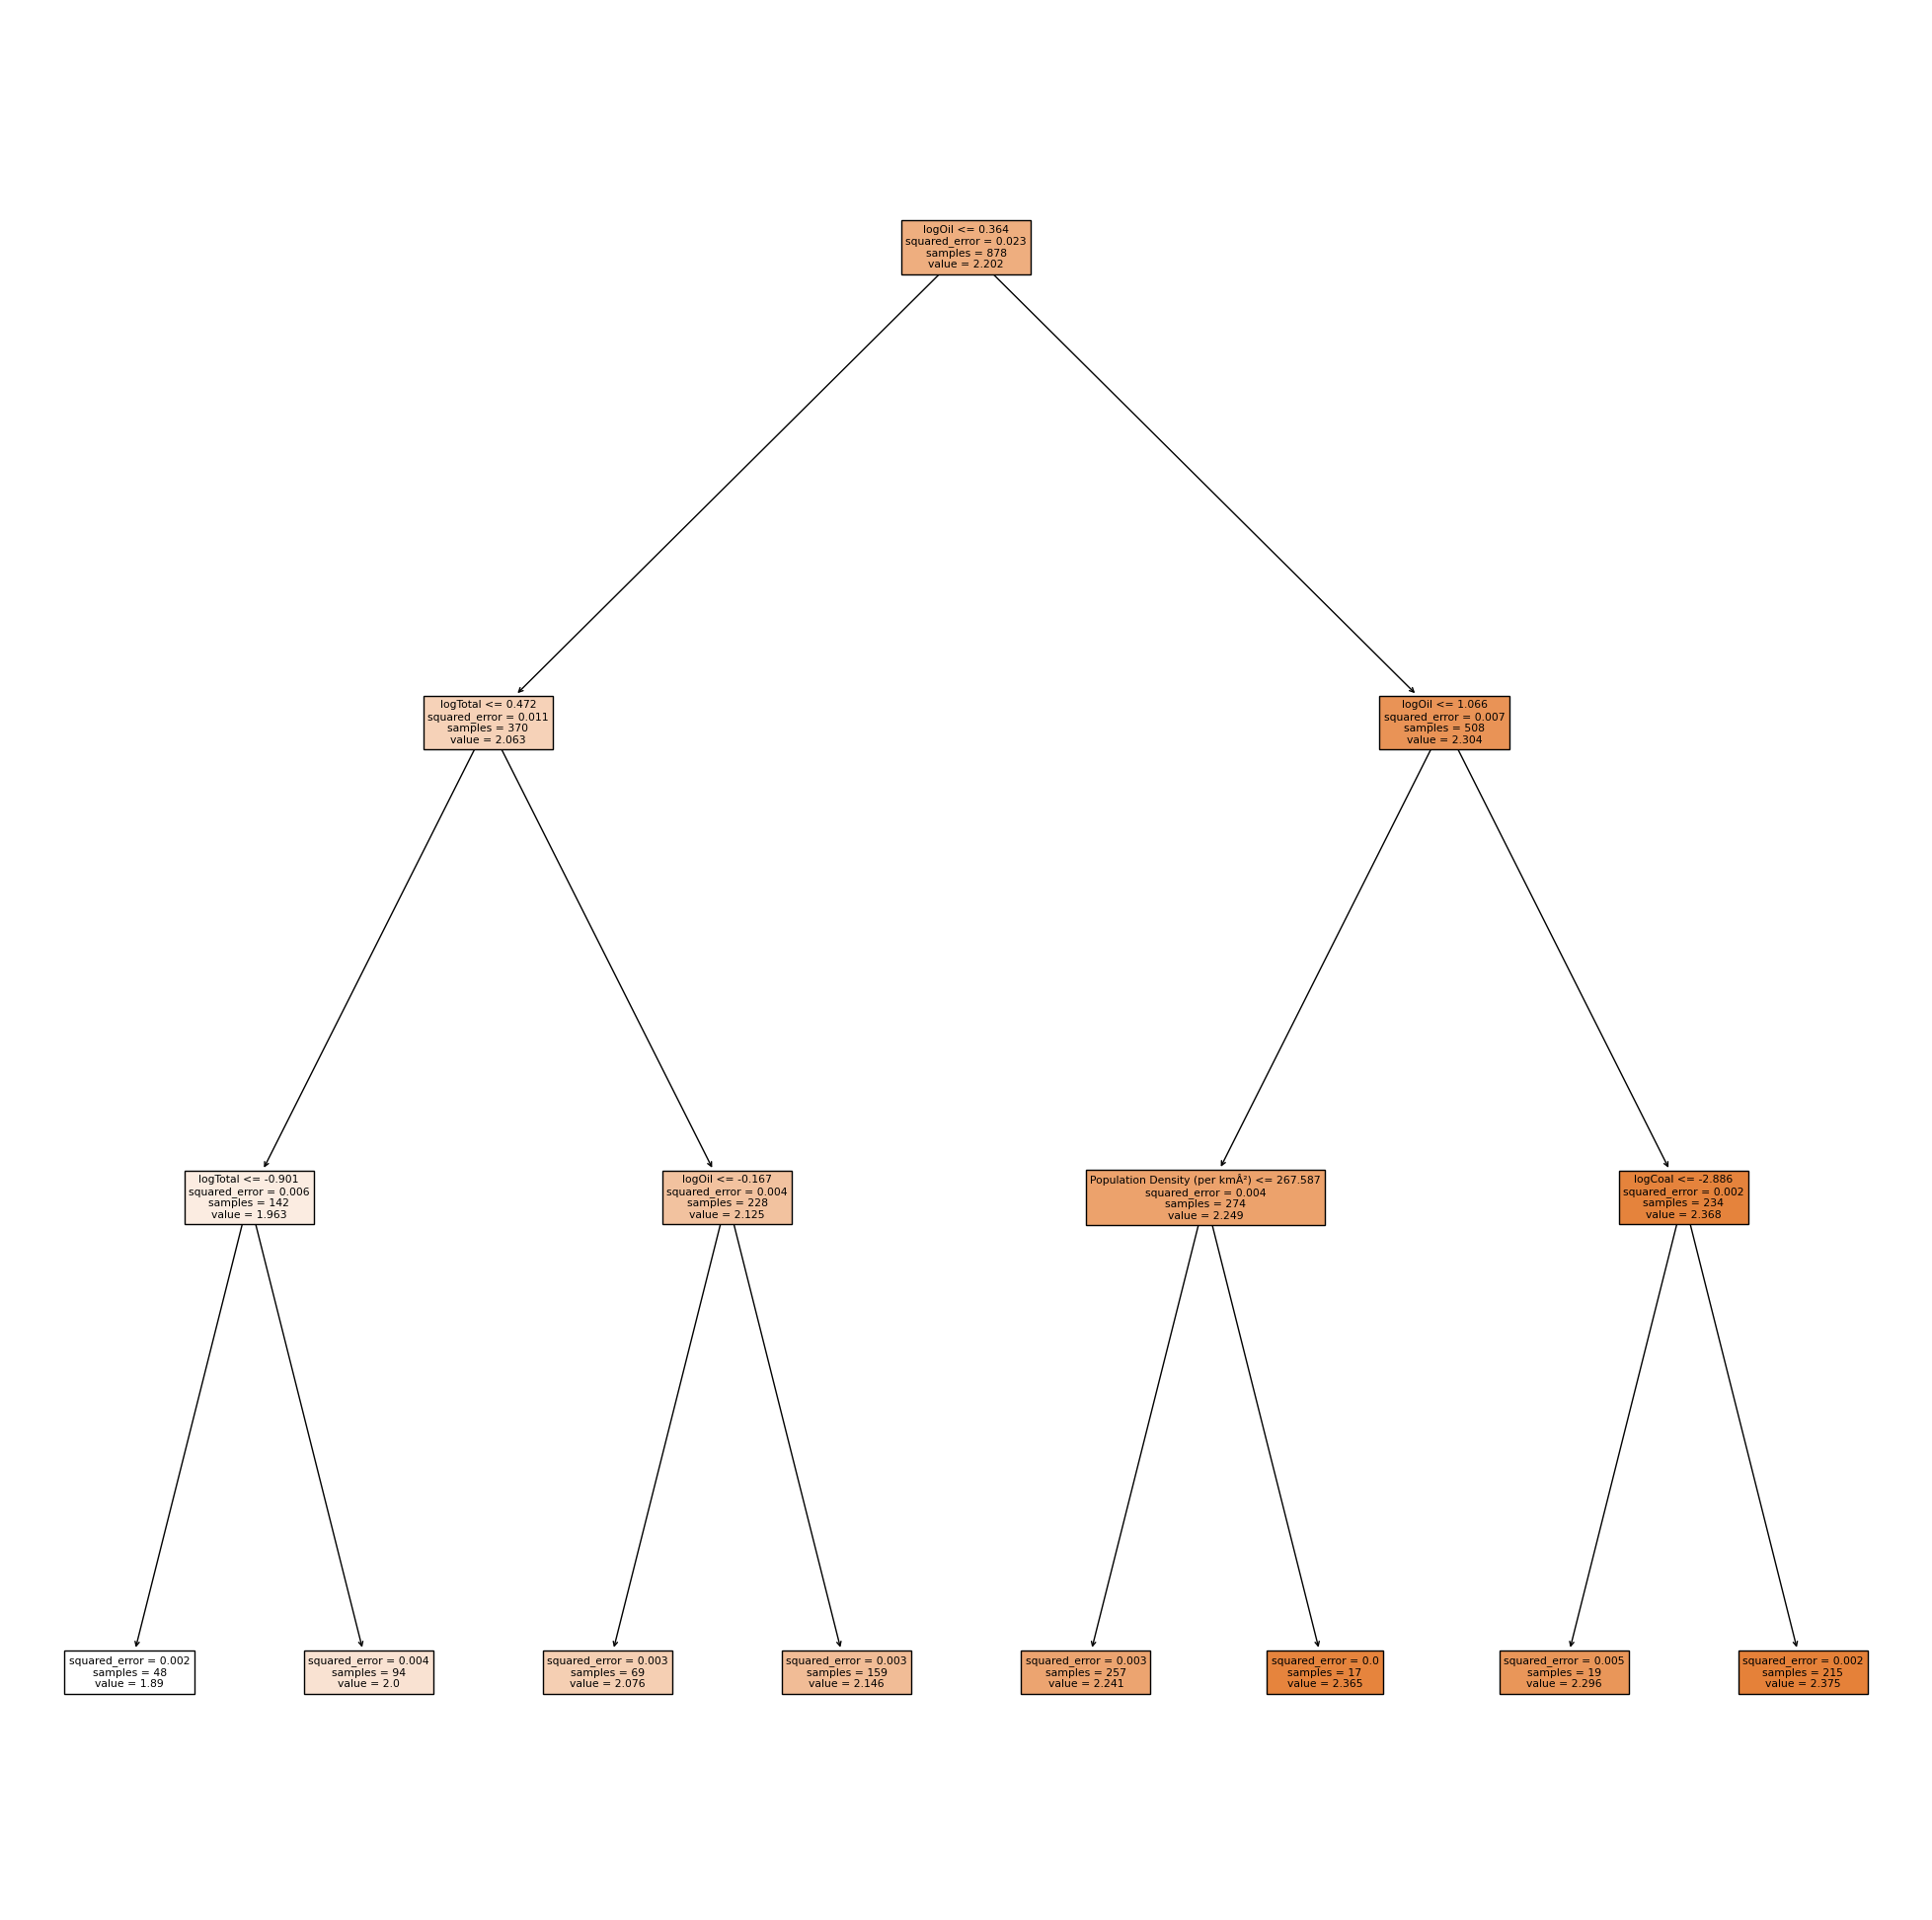

In [145]:
sqrf_fig = plt.figure(figsize=(25,25))
sqrf_fig = tree.plot_tree(GDP_tree, feature_names=X.columns, filled=True)

# Conclusion


Our main findings from this paper is split into two parts the effect of emission levels on GDP per capita and the effect of emission levels on HDI. To explain the relationship between GDP per capita and emissions, our final model is - 
$\log(GDP) = \beta_0 + \beta_1\log(Coal) + \beta_2\log(Gas) + \beta_3\log(Oil) + \beta_4\log(Cement) + \beta_{5}ForestCover + \beta_{6}PopDensity + \beta_{7}PopGrowthRate$ 

We therefore have a non linear (log-log) relationship between GDP and $CO_2$ emissions from fossil fuels. We remove log(Total) to eliminate possible multicollinearity in the model. Our results from this tell us that an increase in emissions from all fossil fuels other than cement result in higher development level. Therefore, we have positive $\beta_1 , \beta_2 , \beta_3$ values. All our OLS parameter estimates are significant at a 1% level. Therefore our result in statistically significant. The parameter estimates are not very small, which suggested that the model is economically significant as well. 

Similarly, To explain the relationship between HDI and emissions, our final model is - 

$HDI = \beta_0 + \beta_1\log(Oil) + \beta_2\log(Gas) +\beta_3\log(Total)$

We therefore have a non linear (linear-log) relationship between HDI and $CO_2$ emissions from fossil fuels. Our results from this tell us that an increase in emissions from Oil and Gas result in higher development level. Therefore, we have positive $\beta_1 , \beta_2$ values. All our OLS parameter estimates are significant at a 1% level. Therefore our result in statistically significant. The parameter estimates are not very small, which suggested that the model is economically significant as well. 

Therefore, from our analysis above and through the OLS estimates we found in both our models, we see that there is a strong positive non-linear relationship between the developement level of a country and the composition and level of CO2 emissions from fossil fuels, using both the indicators: GDP per capita and HDI. Controlling for factors such as Forest cover, Population density an Population Growth Rate help us reduce the omitted variable bias and give us a better understanding of the relationship between the variables. We also eliminate pausible causality bias by running a 2LS regression, which gave us the same results. Therefore, this confirms our hypothesis that an increase in total emissions leads to an increase in the development levels of country (both GDP per Capita and HDI)

There are few limitations of our analysis caused by the limitations of using HDI and GDP per capita as measures of development levels. Other limitations are due to a possible omitted variable bias, such as changes in education and standard of living in HDI which can be controlled for. Similar limitatinons apply to the GDP per capita regression. There may also exist several large outliers which act as leverage points and influence our regression estimates, therefore giving us inaccurate estimates. It is also hard to determine the best model, as adjusted $R^2$ and residual std.Error is not the best way to determine this. Using AIC or BIC would give us a better model fit, therefore we may have a model seletion bias. 

**Bibliography**

1. Devastator, T. (2023, January 24). Emissions by country. Kaggle. Retrieved March 3, 2023, from https://www.kaggle.com/datasets/thedevastator/global-fossil-co2-emissions-by-country-2002-2022 

2. Tas, O. C. (2022, March 19). World GDP(GDP, GDP per capita, and annual growths). Kaggle. Retrieved March 3, 2023, from https://www.kaggle.com/datasets/zgrcemta/world-gdpgdp-gdp-per-capita-and-annual-growths 

3. How developing countries struggling with air pollution can reduce emissions. Air Filters for Clean Air. (2020, May 4. Retrieved March 3, 2023, from https://cleanair.camfil.us/2018/03/14/developing-countries-struggling-air-pollution-can-reduce-emissions/#:~:text=Though%20every%20country%20in%20the,their%20pollution%20problems%20are%20worse. 

4. Carbon emissions anywhere threaten development everywhere. UNCTAD. (2021, June 2). Retrieved March 24, 2023, from https://unctad.org/news/carbon-emissions-anywhere-threaten-development-everywhere 

5. World Wildlife Fund. (n.d.). Responsible forestry. WWF. Retrieved March 24, 2023, from https://www.worldwildlife.org/industries/responsible-forestry#:~:text=They%20purify%20the%20air%20we,and%20food%20to%20medicinal%20plants.\ 

6. Cutting global carbon emissions: Where do cities stand? World Bank Blogs. (n.d.). Retrieved March 24, 2023, from https://blogs.worldbank.org/sustainablecities/cutting-global-carbon-emissions-where-do-cities-stand#:~:text=Cities%20account%20for%20over%2070,constructed%20with%20carbon-intensive%20materials. 

In [152]:
!jupyter nbconvert --to pdf ECO225projectfinal.ipynb

[NbConvertApp] Converting notebook ECO225projectfinal.ipynb to pdf
/Users/tanyagupta/opt/anaconda3/lib/python3.9/site-packages/nbconvert/utils/pandoc.py:52: RuntimeWarning: You are using an unsupported version of pandoc (3.1).
Your version must be at least (1.12.1) but less than (3.0.0).
Refer to https://pandoc.org/installing.html.
Continuing with doubts...
  check_pandoc_version()
[NbConvertApp] Support files will be in ECO225projectfinal_files/
[NbConvertApp] Making directory ./ECO225projectfinal_files
[NbConvertApp] Making directory ./ECO225projectfinal_files
[NbConvertApp] Making directory ./ECO225projectfinal_files
[NbConvertApp] Making directory ./ECO225projectfinal_files
[NbConvertApp] Making directory ./ECO225projectfinal_files
[NbConvertApp] Making directory ./ECO225projectfinal_files
[NbConvertApp] Making directory ./ECO225projectfinal_files
[NbConvertApp] Making directory ./ECO225projectfinal_files
[NbConvertApp] Making directory ./ECO225projectfinal_files
[NbConvertApp] Mak